# Data Analysis of Airbnb Boston listings and Price Prediction using CRISP-DM Process
### A blog post project as part of my Udacity Data Scientist Nanodegree Program

## Introduction

This project is part of Udacity Data Scientist Nano Degree program. The objective of this project is to write a data science blog post describing major phases of CRISP-DM process. 

CRISP-DM known as Cross-industry standard process for data mining is an industry standard process model that describes common approaches, techniques and best practices being used for the data mining process. It is an open standard process model that describes common approaches used by data mining experts and is the most widely used analytics model in majority of Data Science projects.

Each phase corresponds to the specific activities that usually exist in any Data Science projects. Below are the 6 phases of the process.

   1. [Business Understanding](#Business_Understanding)
   2. [Data Understanding](#Data_understanding)
   3. [Data Preparation](#Data_Preparation)
   4. [Modeling](#Modeling)
   5. [Evaluation](#Evaluation)
   6. [Deploy](#Model_Deploy)
   
The below diagram is a pictorial depiction of this process. 

![CRISP_DM_Process](screenshots/CRISP_DM_Process.gif)



This project is focused on analyzing listings data and predicting Boston Airbnb property prices using above CRISP DM phases.

Data explored as part of this project contains detailed information provided by guests about property listings, their key features and types, such as property type, host type, neighborhood, reviews and much more and its calendar details of homestays in Boston. The data was obtained from [Inside AirBnB](http://insideairbnb.com/get-the-data.html).

My blog post on this project can be checked on medium platform [here](https://medium.com/@siddharthsabat/a-data-analysis-of-airbnb-boston-listings-324de993ca9e)

<a id='Business_Understanding'></a>
## 1. Business Understanding 

Understanding the business requirement is one of significant task in any Data Science project and hence most important for data scientists. One needs to clearly understand the problem to convert it into a well-defined analytics problem. Only then a brilliant strategy can be implemented to solve the problem. Otherwise a substantial amount of time and energy will be wasted solving the wrong problem statement! One needs to undertake the following steps to understand the business requirement fully.
* Determine the business objectives clearly
* Assess the situation
* Determine the goals of data analysis
* Produce a project plan

In our case, below are the business related queries for which we need to analyze and interpret the data.
1. Which are the neighborhoods with highest listings?
2. Find out the most and the least expensive neighborhoods.
3. How does pricing fluctuate in a monthly basis and which time of the year normally the price are high?
4. Which property types and room types are comparatively listed the most?
5. How are the listings distributed across the Boston city?
6. Create a model to predict property pricing.
7. What are the features that influence the property pricing?

<a id='Data_understanding'></a>
## 2. Data Understanding

The data understanding phase closely related with the business understanding phase and encourages the focus to ascertain, assemble, and scrutinize the data sets that can help you achieve the project goals. 
Exploratory data analysis often performed as part of this phase to find meaningful insights from the provided data.
This phase includes the following tasks :
* Collect initial data
* Describe data
* Explore data: Find insights from the data. Use different visualization methods, visualize it, and identify relationships and patterns among the data.
* Verify data quality including Identify missing values

In [1]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#Import necessary libraries for performing prediction
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_absolute_error

### 2.1 Read data from csv files.

**Listings**: Contains full descriptions and average review score

**Reviews**: Contains unique id for each reviewer and detailed comments

**Calendar**: Contains listing id and the price and availability for that day


In [2]:
df_listings = pd.read_csv("./data/listings.csv") 
df_calendar = pd.read_csv("./data/calendar.csv")

#### Listings Dataset

In [3]:
#Preview of the listings dataset
df_listings.head(3)

id                            listing_url       scrape_id  \
0  12147973  https://www.airbnb.com/rooms/12147973  20160906204935   
1   3075044   https://www.airbnb.com/rooms/3075044  20160906204935   
2      6976      https://www.airbnb.com/rooms/6976  20160906204935   

  last_scraped                               name  \
0   2016-09-07         Sunny Bungalow in the City   
1   2016-09-07  Charming room in pet friendly apt   
2   2016-09-07   Mexican Folk Art Haven in Boston   

                                             summary  \
0  Cozy, sunny, family home.  Master bedroom high...   
1  Charming and quiet room in a second floor 1910...   
2  Come stay with a friendly, middle-aged guy in ...   

                                               space  \
0  The house has an open and cozy feel at the sam...   
1  Small but cozy and quite room with a full size...   
2  Come stay with a friendly, middle-aged guy in ...   

                                         description experiences_offered  \
0  Cozy, sunny, family home.  Master bedroom high...                none   
1  Charming and quiet room in a second floor 1910...                none   
2  Come stay with a friendly, middle-aged guy in ...                none   

                               neighborhood_overview  ... review_scores_value  \
0  Roslindale is quiet, convenient and friendly. ...  ...                 NaN   
1  The room is in Roslindale, a diverse and prima...  ...                 9.0   
2  The LOCATION: Roslindale is a safe and diverse...  ...                10.0   

  requires_license license jurisdiction_names instant_bookable  \
0                f     NaN                NaN                f   
1                f     NaN                NaN                t   
2                f     NaN                NaN                f   

  cancellation_policy require_guest_profile_picture  \
0            moderate                             f   
1            moderate                             f   
2            moderate                             t   

  require_guest_phone_verification calculated_host_listings_count  \
0                                f                              1   
1                                f                              1   
2                                f                              1   

   reviews_per_month  
0                NaN  
1               1.30  
2               0.47  

[3 rows x 95 columns]

In [4]:
#Identify the number of rows and columns in the dataset
print("No of rows in df_listings dataset are {},  no of columns are {} and size is {}".format(df_listings.shape[0], df_listings.shape[1], df_listings.size))

No of rows in df_listings dataset are 3585,  no of columns are 95 and size is 340575


In [5]:
# check detailed info abour df_listings for no of columns, datatypes and null values
df_listings.info(verbose = True, null_counts = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3585 entries, 0 to 3584
Data columns (total 95 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   id                                3585 non-null   int64  
 1   listing_url                       3585 non-null   object 
 2   scrape_id                         3585 non-null   int64  
 3   last_scraped                      3585 non-null   object 
 4   name                              3585 non-null   object 
 5   summary                           3442 non-null   object 
 6   space                             2528 non-null   object 
 7   description                       3585 non-null   object 
 8   experiences_offered               3585 non-null   object 
 9   neighborhood_overview             2170 non-null   object 
 10  notes                             1610 non-null   object 
 11  transit                           2295 non-null   object 
 12  access

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: null_counts is deprecated. Use show_counts instead
  


In [6]:
# Check descriptive statistics
df_listings.describe()

id     scrape_id       host_id  host_listings_count  \
count  3.585000e+03  3.585000e+03  3.585000e+03          3585.000000   
mean   8.440875e+06  2.016091e+13  2.492311e+07            58.902371   
std    4.500787e+06  0.000000e+00  2.292781e+07           171.119663   
min    3.353000e+03  2.016091e+13  4.240000e+03             0.000000   
25%    4.679319e+06  2.016091e+13  6.103425e+06             1.000000   
50%    8.577620e+06  2.016091e+13  1.928100e+07             2.000000   
75%    1.278953e+07  2.016091e+13  3.622147e+07             7.000000   
max    1.493346e+07  2.016091e+13  9.385411e+07           749.000000   

       host_total_listings_count  neighbourhood_group_cleansed     latitude  \
count                3585.000000                           0.0  3585.000000   
mean                   58.902371                           NaN    42.340032   
std                   171.119663                           NaN     0.024403   
min                     0.000000                           NaN    42.235942   
25%                     1.000000                           NaN    42.329995   
50%                     2.000000                           NaN    42.345201   
75%                     7.000000                           NaN    42.354685   
max                   749.000000                           NaN    42.389982   

         longitude  accommodates    bathrooms  ...  review_scores_accuracy  \
count  3585.000000   3585.000000  3571.000000  ...             2762.000000   
mean    -71.084818      3.041283     1.221647  ...                9.431571   
std       0.031565      1.778929     0.501487  ...                0.931863   
min     -71.171789      1.000000     0.000000  ...                2.000000   
25%     -71.105083      2.000000     1.000000  ...                9.000000   
50%     -71.078429      2.000000     1.000000  ...               10.000000   
75%     -71.062155      4.000000     1.000000  ...               10.000000   
max     -71.000100     16.000000     6.000000  ...               10.000000   

       review_scores_cleanliness  review_scores_checkin  \
count                2767.000000            2765.000000   
mean                    9.258041               9.646293   
std                     1.168977               0.762753   
min                     2.000000               2.000000   
25%                     9.000000               9.000000   
50%                    10.000000              10.000000   
75%                    10.000000              10.000000   
max                    10.000000              10.000000   

       review_scores_communication  review_scores_location  \
count                  2767.000000             2763.000000   
mean                      9.646549                9.414043   
std                       0.735507                0.903436   
min                       4.000000                2.000000   
25%                       9.000000                9.000000   
50%                      10.000000               10.000000   
75%                      10.000000               10.000000   
max                      10.000000               10.000000   

       review_scores_value  license  jurisdiction_names  \
count          2764.000000      0.0                 0.0   
mean              9.168234      NaN                 NaN   
std               1.011116      NaN                 NaN   
min               2.000000      NaN                 NaN   
25%               9.000000      NaN                 NaN   
50%               9.000000      NaN                 NaN   
75%              10.000000      NaN                 NaN   
max              10.000000      NaN                 NaN   

       calculated_host_listings_count  reviews_per_month  
count                     3585.000000        2829.000000  
mean                        12.733891           1.970908  
std                         29.415076           2.120561  
min                          1.000000           0.010000  
25%                          1.0000

In [7]:
# Columns without missing values
df_listings.columns[df_listings.isnull().mean() == 0] 
# df_listings.columns[df_listings.isnull().sum()==0] 

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'name', 'description',
       'experiences_offered', 'picture_url', 'host_id', 'host_url',
       'host_name', 'host_since', 'host_is_superhost', 'host_thumbnail_url',
       'host_picture_url', 'host_listings_count', 'host_total_listings_count',
       'host_verifications', 'host_has_profile_pic', 'host_identity_verified',
       'street', 'neighbourhood_cleansed', 'state', 'smart_location',
       'country_code', 'country', 'latitude', 'longitude', 'is_location_exact',
       'room_type', 'accommodates', 'bed_type', 'amenities', 'price',
       'guests_included', 'extra_people', 'minimum_nights', 'maximum_nights',
       'calendar_updated', 'availability_30', 'availability_60',
       'availability_90', 'availability_365', 'calendar_last_scraped',
       'number_of_reviews', 'requires_license', 'instant_bookable',
       'cancellation_policy', 'require_guest_profile_picture',
       'require_guest_phone_verification', 'calculat

In [8]:
#Columns with missing values
print("Column names with missing values: \n", df_listings.columns[df_listings.isnull().sum(axis=0)>0].values)

#Total no of missing values in df_listings dataset
print("Total number of missing values are:",df_listings.isnull().sum().sum())

Column names with missing values: 
 ['summary' 'space' 'neighborhood_overview' 'notes' 'transit' 'access'
 'interaction' 'house_rules' 'thumbnail_url' 'medium_url' 'xl_picture_url'
 'host_location' 'host_about' 'host_response_time' 'host_response_rate'
 'host_acceptance_rate' 'host_neighbourhood' 'neighbourhood'
 'neighbourhood_group_cleansed' 'city' 'zipcode' 'market' 'property_type'
 'bathrooms' 'bedrooms' 'beds' 'square_feet' 'weekly_price'
 'monthly_price' 'security_deposit' 'cleaning_fee' 'has_availability'
 'first_review' 'last_review' 'review_scores_rating'
 'review_scores_accuracy' 'review_scores_cleanliness'
 'review_scores_checkin' 'review_scores_communication'
 'review_scores_location' 'review_scores_value' 'license'
 'jurisdiction_names' 'reviews_per_month']
Total number of missing values are: 50229


In [9]:
col_count = len(df_listings.columns)
na_cols = len(df_listings.columns[df_listings.isnull().sum(axis=0)>0].values)
total_na = df_listings.isnull().sum().sum()
print("Out of {} columns in the listnigs data set, {} columns are having missing values with total of: {}".format(col_count, na_cols, total_na))

Out of 95 columns in the listnigs data set, 44 columns are having missing values with total of: 50229


In [10]:
# Columns with 75% or more missing values
print("Columns with 75% or more missing values: \n",df_listings.columns[df_listings.isnull().mean() > 0.75].values)

Columns with 75% or more missing values: 
 ['neighbourhood_group_cleansed' 'square_feet' 'weekly_price'
 'monthly_price' 'has_availability' 'license' 'jurisdiction_names']


#### Calendar Dataset

In [11]:
# Check the availabe data from which period
pd.to_datetime(df_calendar.date).sort_values(ascending = False)[0]
pd.to_datetime(df_calendar.date).sort_values(ascending = True)[0]

Timestamp('2017-09-05 00:00:00')

In [12]:
#preview of calender data
df_calendar.head()

listing_id        date available price
0    12147973  2017-09-05         f   NaN
1    12147973  2017-09-04         f   NaN
2    12147973  2017-09-03         f   NaN
3    12147973  2017-09-02         f   NaN
4    12147973  2017-09-01         f   NaN

In [13]:
#Identify the number of rows and columns in the dataset
print("No of rows in df_calender dataset are {},  no of columns are {} and size is {}".format(df_calendar.shape[0], df_calendar.shape[1], df_calendar.size))

No of rows in df_calender dataset are 1308890,  no of columns are 4 and size is 5235560


In [14]:
# check detailed info abour df_calender for no of columns, datatypes and null values# Check columns, type and null values
df_calendar.info(verbose = True, show_counts = True )#null_counts = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1308890 entries, 0 to 1308889
Data columns (total 4 columns):
 #   Column      Non-Null Count    Dtype 
---  ------      --------------    ----- 
 0   listing_id  1308890 non-null  int64 
 1   date        1308890 non-null  object
 2   available   1308890 non-null  object
 3   price       643037 non-null   object
dtypes: int64(1), object(3)
memory usage: 39.9+ MB


In [15]:
# Check descriptive statistics
df_calendar.describe()

listing_id
count  1.308890e+06
mean   8.442118e+06
std    4.500149e+06
min    3.353000e+03
25%    4.679319e+06
50%    8.578710e+06
75%    1.279603e+07
max    1.493346e+07

In [16]:
# Columns without missing values
print('Column names without missing values are: \n',df_calendar.columns[df_calendar.isnull().mean() == 0].values)

Column names without missing values are: 
 ['listing_id' 'date' 'available']


In [17]:
# Columns with missing values
print("Column names with missing values are: \n",df_calendar.columns[df_calendar.isnull().sum(axis=0)>0].values)

Column names with missing values are: 
 ['price']


In [18]:
#Total no of missing values column wise
df_calendar.isnull().sum()

listing_id         0
date               0
available          0
price         665853
dtype: int64

In [19]:
col_count = len(df_calendar.columns)
na_cols = len(df_calendar.columns[df_calendar.isnull().sum(axis=0)>0].values)
total_na = df_calendar.isnull().sum().sum()
print("Out of {} columns in the calendar data set, {} columns are having missing values with total of: {}".format(col_count, na_cols, total_na))

Out of 4 columns in the calendar data set, 1 columns are having missing values with total of: 665853


In [20]:
# Columns with 75% o more missing values
print("Columns with 75% o more missing values: \n", df_calendar.columns[df_calendar.isnull().mean() > .75].values)

Columns with 75% o more missing values: 
 []


### 2.2 Visualize the distribution of listing data

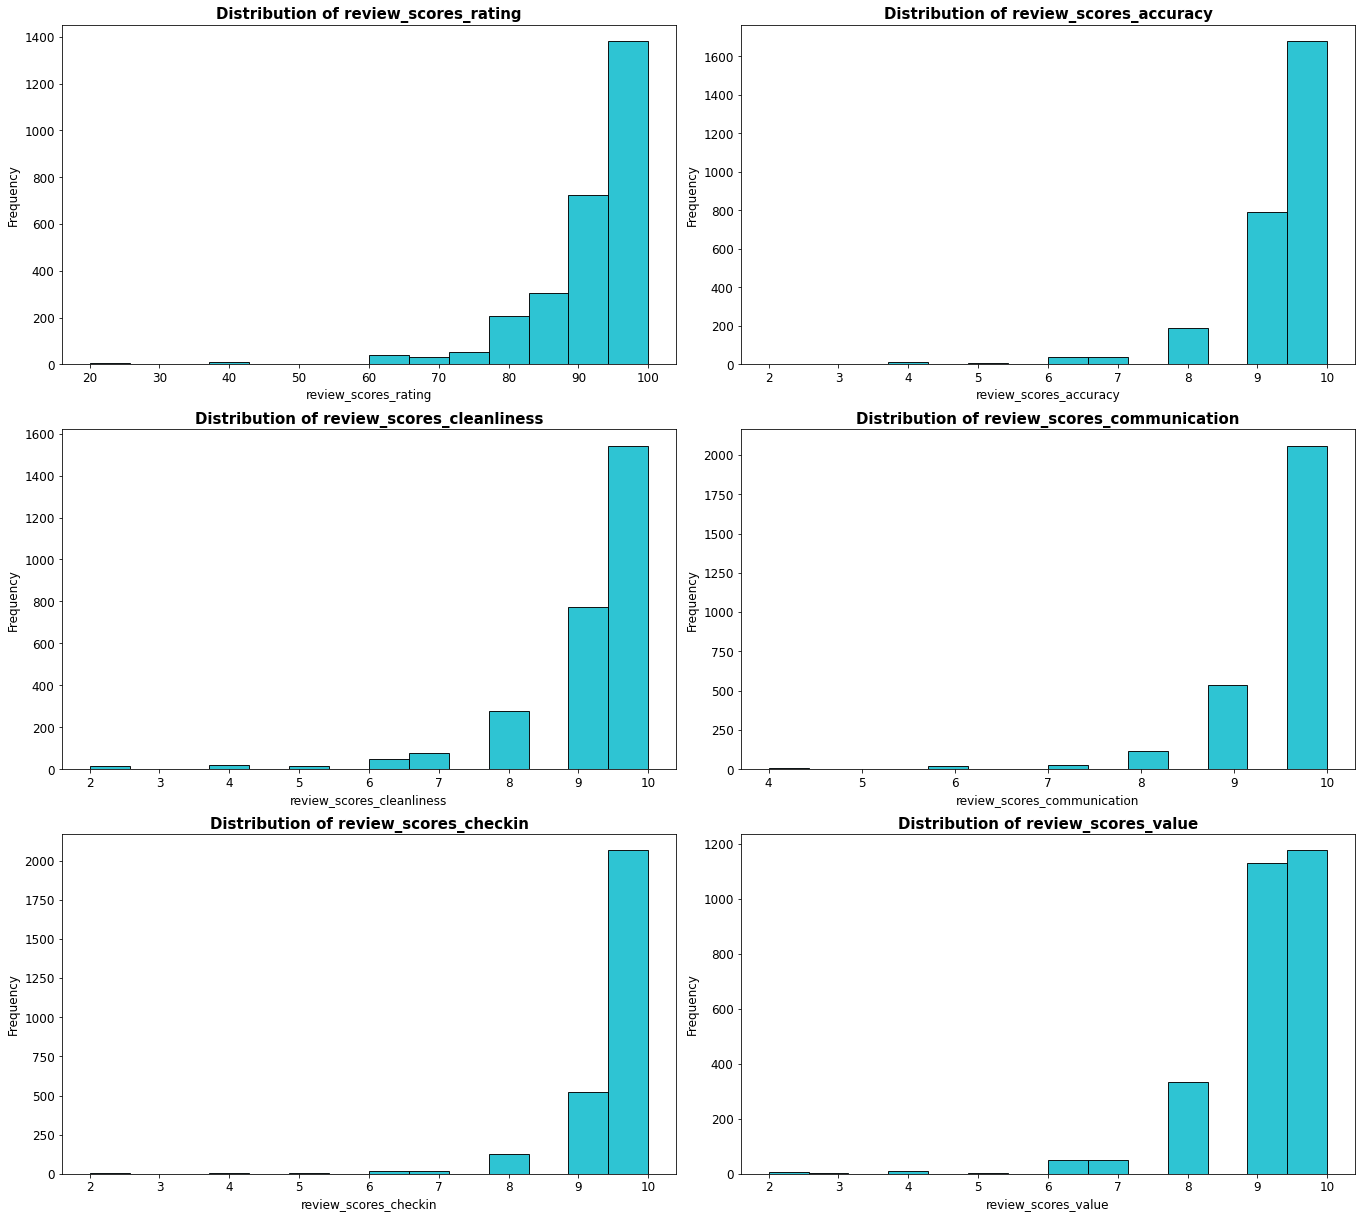

In [21]:
plt.figure(figsize = [19, 17])
plt.subplot(3,2,1)
base = sns.color_palette()[9]
plt.hist(df_listings["review_scores_rating"], color = base, alpha=0.9, bins = 14,  histtype='bar', ec='black', density=False);
#sns.displot(df_listings, x="review_scores_rating")
plt.title('Distribution of review_scores_rating', weight = 'bold', fontsize = 15)
plt.xlabel('review_scores_rating', fontsize = 12)
plt.ylabel('Frequency', fontsize = 12)
plt.xticks(fontsize = 12);
plt.yticks(fontsize = 12);

plt.subplot(3,2,2)
plt.hist(df_listings["review_scores_accuracy"], color = base, alpha=0.9, bins = 14,  histtype='bar', ec='black', density=False);
plt.title('Distribution of review_scores_accuracy',  weight = 'bold', fontsize = 15)
plt.xlabel('review_scores_accuracy',  fontsize = 12)
plt.ylabel('Frequency',  fontsize = 12)
plt.xticks(fontsize = 12);
plt.yticks(fontsize = 12);


plt.subplot(3,2,3)
plt.hist(df_listings["review_scores_cleanliness"], color = base, alpha=0.9, bins = 14,  histtype='bar', ec='black', density=False);
plt.title('Distribution of review_scores_cleanliness',  weight = 'bold', fontsize = 15)
plt.xlabel('review_scores_cleanliness',  fontsize = 12)
plt.ylabel('Frequency',  fontsize = 12)
plt.xticks(fontsize = 12);
plt.yticks(fontsize = 12);

plt.subplot(3,2,4)
plt.hist(df_listings["review_scores_communication"], color = base, alpha=0.9, bins = 14,  histtype='bar', ec='black', density=False);
plt.title('Distribution of review_scores_communication',  weight = 'bold', fontsize = 15)
plt.xlabel('review_scores_communication',  fontsize = 12)
plt.ylabel('Frequency',  fontsize = 12)
plt.xticks(fontsize = 12);
plt.yticks(fontsize = 12);

plt.subplot(3,2,5)
plt.hist(df_listings["review_scores_checkin"], color = base, alpha=0.9, bins = 14,  histtype='bar', ec='black', density=False);
plt.title('Distribution of review_scores_checkin',  weight = 'bold', fontsize = 15)
plt.xlabel('review_scores_checkin',  fontsize = 12)
plt.ylabel('Frequency',  fontsize = 12)
plt.xticks(fontsize = 12);
plt.yticks(fontsize = 12);

plt.subplot(3,2,6)
plt.hist(df_listings["review_scores_value"], color = base, alpha=0.9, bins = 14,  histtype='bar', ec='black', density=False);
plt.title('Distribution of review_scores_value',  weight = 'bold', fontsize = 15)
plt.xlabel('review_scores_value', fontsize = 12)
plt.ylabel('Frequency', fontsize = 12);
plt.xticks(fontsize = 12);
plt.yticks(fontsize = 12);

plt.tight_layout(pad =1)
plt.savefig('./screenshots/0_Parameters_Distribution.png', dpi=600, bbox_inches ='tight')
plt.show()

From the above visualization, it indicates all the parameters are left skewed, dragging the mean of each parameters towards the left side of the distribution.

<a id='Data_Preparation'></a>
## 3. Data Preparation

This phase often referred to as "data wrangling" or "data munging", has the objective is to develop final data set(s) for modelling. It covers all activities to construct the final dataset from the initial raw data. Tasks that are performed as part of this phase includes Select data sets, Clean data and Format data.


### 3.1 Data Wrangling of df_listings data

In order to analyse the property size, we need to consider the property type, room type, and bedrooms feature from the data set.

In [22]:
# Drop unnecessary columns
cols_to_drop = ['id', 
            'scrape_id', 
            'last_scraped',
            'host_id',
            'host_name',
            'host_since',
            'host_location',
            'host_about',
            'host_verifications', 
            'host_neighbourhood',           
            'street',
            'neighbourhood',
            'neighbourhood_group_cleansed',
            'city',
            'state',
            'zipcode',
            'market',
            'country_code',
            'country',
            'weekly_price',
            'monthly_price',
            'square_feet',
           'license',
           'jurisdiction_names',
           'smart_location',
           'calendar_last_scraped',
           'calendar_updated',
           'first_review', 
            'last_review',
           'require_guest_profile_picture',
           'require_guest_phone_verification',          
           'requires_license',
            'has_availability',
            'experiences_offered',
            'house_rules'            
           ]

df_listings.drop(cols_to_drop, axis = 1, inplace = True)

In [23]:
#Remove the column which has all values as NaN
print("No of columns before dropping NA values:", df_listings.shape[1])
df_listings.dropna(axis = 1, how = 'all', inplace = True)
print("No of columns after dropping NA values:", df_listings.shape[1]) 

#Note, running the cell twice would produce the same no of columns after and before droping the na values in the print statements

No of columns before dropping NA values: 60
No of columns after dropping NA values: 60


In [24]:
#Fill na with ffill/bfill since it is an object type and cannot be interpreted with numerical methods to fillna
df_listings['host_response_rate'].fillna(method = 'backfill', inplace = True)
df_listings['host_acceptance_rate'].fillna(method = 'backfill', inplace = True)
df_listings['host_response_time'].fillna(method = 'backfill', inplace = True)

In [25]:
print(df_listings.host_response_rate.isnull().sum())
print(df_listings.host_acceptance_rate.isnull().sum())
print(df_listings.host_response_time.isnull().sum())

0
0
0


In [26]:
#preview of host_response_rate and host_acceptance_rate column values (contains % character that needs to be removed)
df_listings[['host_response_rate', 'host_acceptance_rate']][1:5]

host_response_rate host_acceptance_rate
1               100%                 100%
2               100%                  88%
3               100%                  50%
4               100%                 100%

In [27]:
#Remove % sign and convert the data type to int
df_listings['host_response_rate'] = (df_listings['host_response_rate'].str[:-1].astype(int))
df_listings['host_acceptance_rate'] = (df_listings['host_acceptance_rate'].str[:-1].astype(int))

As per the summary of df_listings, bathrooms, bedrooms, and bed columns have a negligible number of rows with null vlaues, so it is better to drop those rows to avoid any little effect of bias in the results.

In [28]:
df_listings[["bathrooms", "bedrooms", "beds"]].isnull().sum()

bathrooms    14
bedrooms     10
beds          9
dtype: int64

In [29]:
#Check the data types for bathrooms, bedrooms, beds columns
df_listings[["bathrooms", "bedrooms", "beds"]].dtypes

bathrooms    float64
bedrooms     float64
beds         float64
dtype: object

In [30]:
#drop na rows in bathrooms, bedrooms, beds since its a negligle number of rows with na value
df_listings.dropna(axis = 0, subset = ["bathrooms", "bedrooms", "beds"], inplace = True)
df_rooms = df_listings[["bathrooms", "bedrooms", "beds"]]
for room in df_rooms:
    df_listings[room] = df_listings[room].astype(int)

In [31]:
#confirm the data types for bathrooms, bedrooms, beds columns have changed to int
df_listings[["bathrooms", "bedrooms", "beds"]].dtypes

bathrooms    int32
bedrooms     int32
beds         int32
dtype: object

In [32]:
#replace $ from the price values and convert the type into float data type
tempdf = df_listings[["cleaning_fee", "security_deposit", "price"]]
for feature in tempdf:
    df_listings[feature] = df_listings[feature].astype('str')
    df_listings[feature] = df_listings[feature].map(lambda x: x.replace("$",'').replace(",",''), na_action = 'ignore')    
    df_listings[feature] = df_listings[feature].astype('float')
    df_listings[feature].fillna(df_listings[feature].median(), inplace = True)
    
    
#Since for distributions that have outliers or are skewed, the median is often the preferred measure of central tendency, as the median
#is more resistant to outliers than the mean, Lets fill the na values with median values for all reviews columns

temp_df = df_listings[["review_scores_rating", "review_scores_accuracy", "review_scores_cleanliness", 
                "review_scores_checkin", "review_scores_communication", "review_scores_location", 
                "review_scores_value", "reviews_per_month"]]

for feature in temp_df:
    df_listings[feature].fillna(df_listings[feature].mean(), inplace = True)

#### Handling Categorical Values in the dataframe

In [33]:
df_listings.bedrooms.dtypes

dtype('int32')

In [34]:
#Create new dataframe selecting only the numerical columns
df_listings_num = df_listings.select_dtypes(include=['int64', 'int32', 'float64'])

df_listings_num.head()

host_response_rate  host_acceptance_rate  host_listings_count  \
0                 100                   100                    1   
1                 100                   100                    1   
2                 100                    88                    1   
3                 100                    50                    1   
4                 100                   100                    1   

   host_total_listings_count   latitude  longitude  accommodates  bathrooms  \
0                          1  42.282619 -71.133068             4          1   
1                          1  42.286241 -71.134374             2          1   
2                          1  42.292438 -71.135765             2          1   
3                          1  42.281106 -71.121021             4          1   
4                          1  42.284512 -71.136258             2          1   

   bedrooms  beds  ...  number_of_reviews  review_scores_rating  \
0         2     3  ...                  0             91.954562   
1         1     1  ...                 36             94.000000   
2         1     1  ...                 41             98.000000   
3         1     2  ...                  1            100.000000   
4         1     2  ...                 29             99.000000   

   review_scores_accuracy  review_scores_cleanliness  review_scores_checkin  \
0                9.435401                   9.261202               9.648195   
1               10.000000                   9.000000              10.000000   
2               10.000000                   9.000000              10.000000   
3               10.000000                  10.000000              10.000000   
4               10.000000                  10.000000              10.000000   

   review_scores_communication  review_scores_location  review_scores_value  \
0                     9.652095                9.416636             9.175055   
1                    10.000000                9.000000             9.000000   
2                    10.000000                9.000000            10.000000   
3                    10.000000               10.000000            10.000000   
4                    10.000000                9.000000            10.000000   

   calculated_host_listings_count  reviews_per_month  
0                               1           1.975508  
1                               1           1.300000  
2                               1           0.470000  
3                               1           1.000000  
4                               1           2.250000  

[5 rows x 30 columns]

In [35]:
#Create new dataframe selecting only the numerical columns
df_listings_num = df_listings.select_dtypes(include=['int64', 'int32', 'float64'])

#add required categorical columns to df_listings_num
df_listings_num[['host_is_superhost', 'room_type', 'neighbourhood_cleansed', 'cancellation_policy', 
        'property_type', 'host_response_time']] = df_listings[['host_is_superhost', 
                                                           'room_type', 'neighbourhood_cleansed', 
                                                           'cancellation_policy', 'property_type', 'host_response_time']]

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:3191: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


In [36]:
df_listings.cancellation_policy.value_counts()

strict             1576
flexible            992
moderate            914
super_strict_30      75
Name: cancellation_policy, dtype: int64

In [37]:
df_listings.room_type.value_counts()

Entire home/apt    2113
Private room       1365
Shared room          79
Name: room_type, dtype: int64

In [38]:
#Converting some of ordinal categorical variables to numerical lables

categories = {"host_is_superhost":     {"t": 1, "f": 2},
                "room_type": {"Entire home/apt": 1, "Private room": 2, "Shared room": 3},
               "cancellation_policy": {"moderate": 1, "flexible": 2, "strict": 3, "super_strict_30": 4}}
df_listings_num_copy = df_listings_num

df_listings_num_copy = df_listings_num_copy.replace(categories)

#creating one hot encoding for the categorical variables- neighbourhood_cleansed, property_type,host_response_time
df_listings_dummies = pd.get_dummies(df_listings_num_copy)
df_listings_dummies.head(2)

host_response_rate  host_acceptance_rate  host_listings_count  \
0                 100                   100                    1   
1                 100                   100                    1   

   host_total_listings_count   latitude  longitude  accommodates  bathrooms  \
0                          1  42.282619 -71.133068             4          1   
1                          1  42.286241 -71.134374             2          1   

   bedrooms  beds  ...  property_type_Guesthouse  property_type_House  \
0         2     3  ...                         0                    1   
1         1     1  ...                         0                    0   

   property_type_Loft  property_type_Other  property_type_Townhouse  \
0                   0                    0                        0   
1                   0                    0                        0   

   property_type_Villa  host_response_time_a few days or more  \
0                    0                                      0   
1                    0                                      0   

   host_response_time_within a day  host_response_time_within a few hours  \
0                                0                                      0   
1                                0                                      0   

   host_response_time_within an hour  
0                                  1  
1                                  1  

[2 rows x 75 columns]

### Data Wrangling of Calendar data

In [39]:
df_calendar.head()

listing_id        date available price
0    12147973  2017-09-05         f   NaN
1    12147973  2017-09-04         f   NaN
2    12147973  2017-09-03         f   NaN
3    12147973  2017-09-02         f   NaN
4    12147973  2017-09-01         f   NaN

In [40]:
#Extract month from dates column and convert that to MMM format
df_calendar['month'] = df_calendar.date.apply(lambda value: value.split('-')[1])
df_calendar['month'] = df_calendar['month'].replace({
    '01': 'Jan',
    '02': 'Feb',
    '03': 'Mar',
    '04': 'Apr',
    '05': 'May',
    '06': 'Jun',
    '07': 'Jul',
    '08': 'Aug',
    '09': 'Sep',
    '10': 'Oct',
    '11': 'Nov',
    '12': 'Dec'
})

#Remove special character $ from price column and convert to float
#Drop rowns with na value in price column 
df_calendar.dropna(axis = 0, subset = ["price"], inplace = True)
df_calendar["price"] = df_calendar["price"].map(lambda x: x.replace("$",'').replace(",",''), na_action = 'ignore').astype(float)
df_calendar['month_num'] = df_calendar.date.apply(lambda value: value.split('-')[1])

df_calendar.head()

listing_id        date available  price month month_num
365     3075044  2017-08-22         t   65.0   Aug        08
366     3075044  2017-08-21         t   65.0   Aug        08
367     3075044  2017-08-20         t   65.0   Aug        08
368     3075044  2017-08-19         t   75.0   Aug        08
369     3075044  2017-08-18         t   75.0   Aug        08

## 3.2 Answering the Business Related Questions from wrangled data and using Visualization approach.

<a id='1'></a>
#### Question-1. Which are the neighborhoods with highest listings?

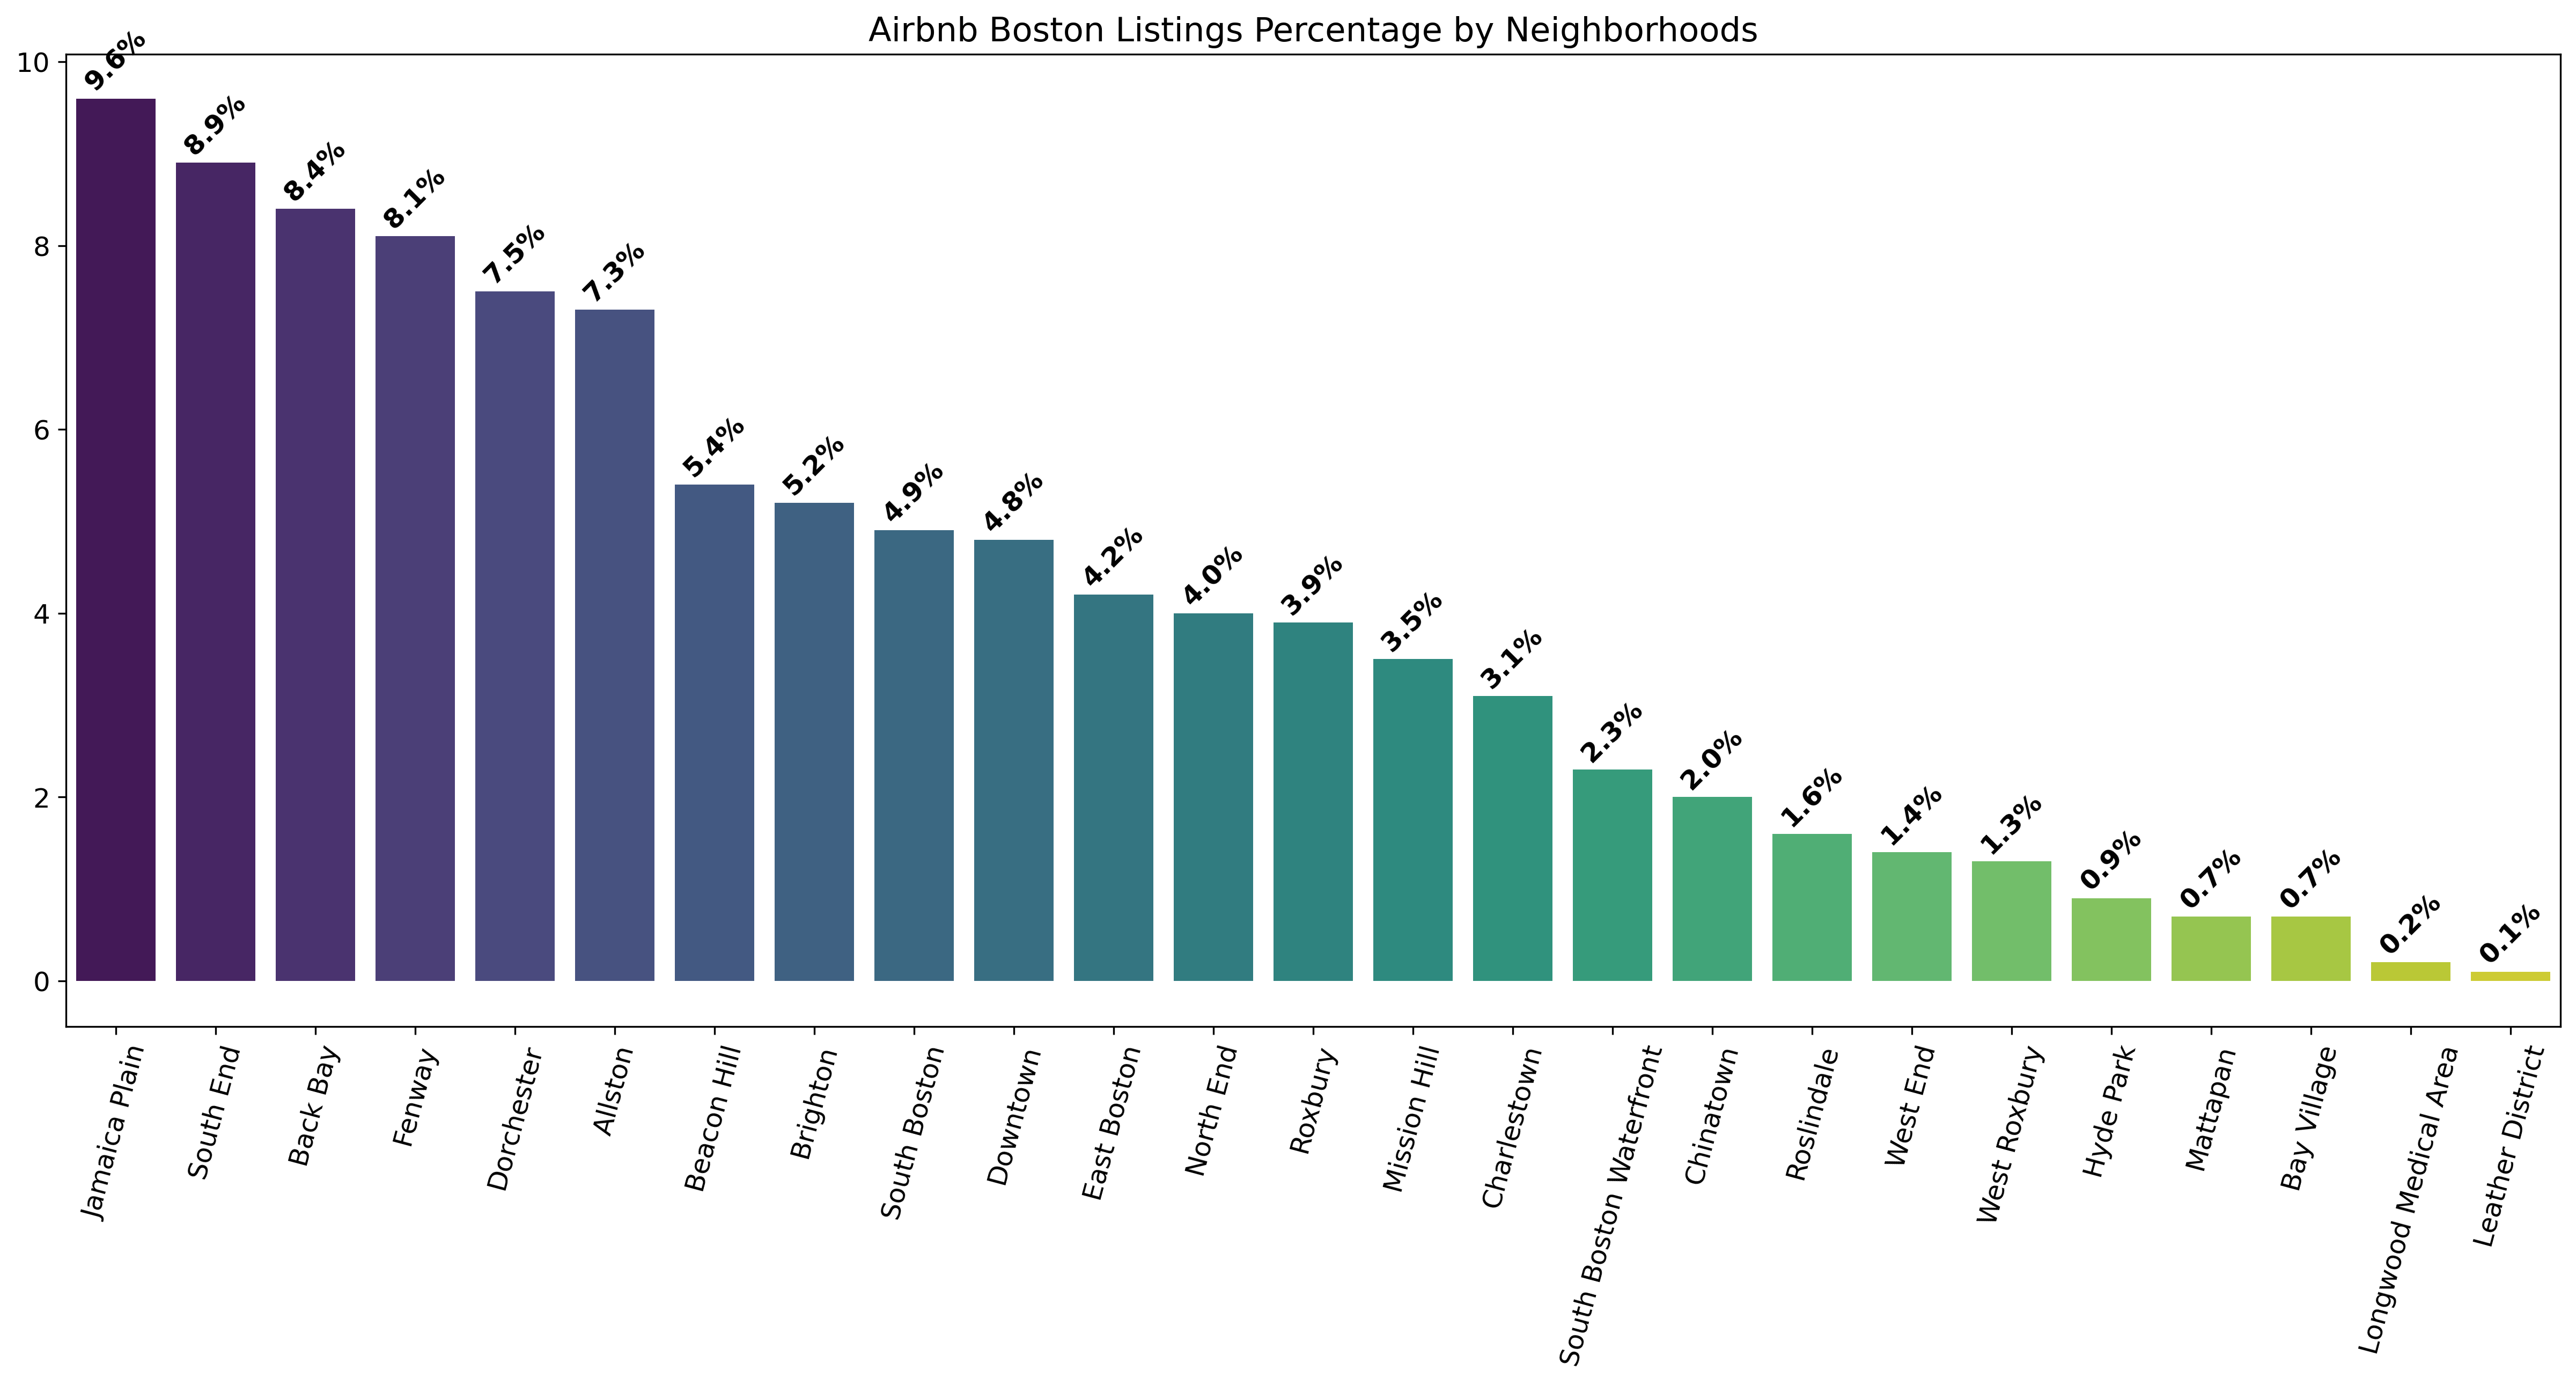

In [41]:
# AirBnB Boston Listings over District Distribution bar plot
plt.figure(figsize=(20, 8), dpi=300 )

x =  (df_listings_num['neighbourhood_cleansed'].value_counts()/df_listings_num.shape[0]).index
y = round((df_listings_num['neighbourhood_cleansed'].value_counts()/df_listings_num.shape[0])*100, 1)
#plt.bar(x,y )
#(df_listings['neighbourhood_cleansed'].value_counts()/df_listings.shape[0]).plot(kind="bar")
sns.barplot(x=x, y=y, order =y.sort_values(ascending=False).index, palette="viridis", alpha=1)

plt.title("Airbnb Boston Listings Percentage by Neighborhoods", fontsize = 15)
#plt.xlabel('Boston- Ditricts', fontsize = 12)
#plt.ylabel('Percentage of District Listings', fontsize = 12);
plt.ylabel("")
plt.xticks(rotation = 75, fontsize = 12);
plt.yticks(fontsize = 12);
plt.ylim(-0.5,)
a = round((df_listings_num['neighbourhood_cleansed'].value_counts()/df_listings_num.shape[0])*100, 1)

for i in range(a.shape[0]):
    count = y[i]
    plt.text(i, count+0.8, str(count)+"%", ha = 'center', va ='top', fontsize = 12, rotation = 45, color = 'black', weight='bold')
plt.savefig('./screenshots/1_Listings_PCT_By_Neighborhoods.png', dpi=600, bbox_inches ='tight')
plt.show()

In [42]:
df_districts = pd.DataFrame()
df_districts['count'] = df_listings_num.neighbourhood_cleansed.value_counts()
df_districts['percentage'] = round(df_listings_num.neighbourhood_cleansed.value_counts()/df_listings_num.shape[0]*100,2)
print('Total no of neighbourhoods in the listing dataset are: ', df_districts['count'].count())
df_districts.sort_values(by = 'count', ascending =False)

Total no of neighbourhoods in the listing dataset are:  25


count  percentage
Jamaica Plain              342        9.61
South End                  318        8.94
Back Bay                   299        8.41
Fenway                     287        8.07
Dorchester                 266        7.48
Allston                    260        7.31
Beacon Hill                193        5.43
Brighton                   185        5.20
South Boston               174        4.89
Downtown                   172        4.84
East Boston                150        4.22
North End                  141        3.96
Roxbury                    139        3.91
Mission Hill               123        3.46
Charlestown                111        3.12
South Boston Waterfront     83        2.33
Chinatown                   71        2.00
Roslindale                  56        1.57
West End                    49        1.38
West Roxbury                46        1.29
Hyde Park                   31        0.87
Mattapan                    24        0.67
Bay Village                 24        0.67
Longwood Medical Area        8        0.22
Leather District             5        0.14

[Navigate Back to Summary Section Question-1](#1_1)

<a id='2'></a>
#### Question-2. Find out the most and least expensive neighborhoods?

In [43]:
# Reformat price column values to remove , and $ if any
df_listings_num['price'] =  df_listings_num["price"].astype('str').map(lambda x: x.replace("$",'').replace(",",''), na_action = 'ignore').astype(float)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [44]:
# Define variable with districts with the most listings
top_districts = list(df_districts.sort_values(by = 'count', ascending =False)[0:28].index.values)

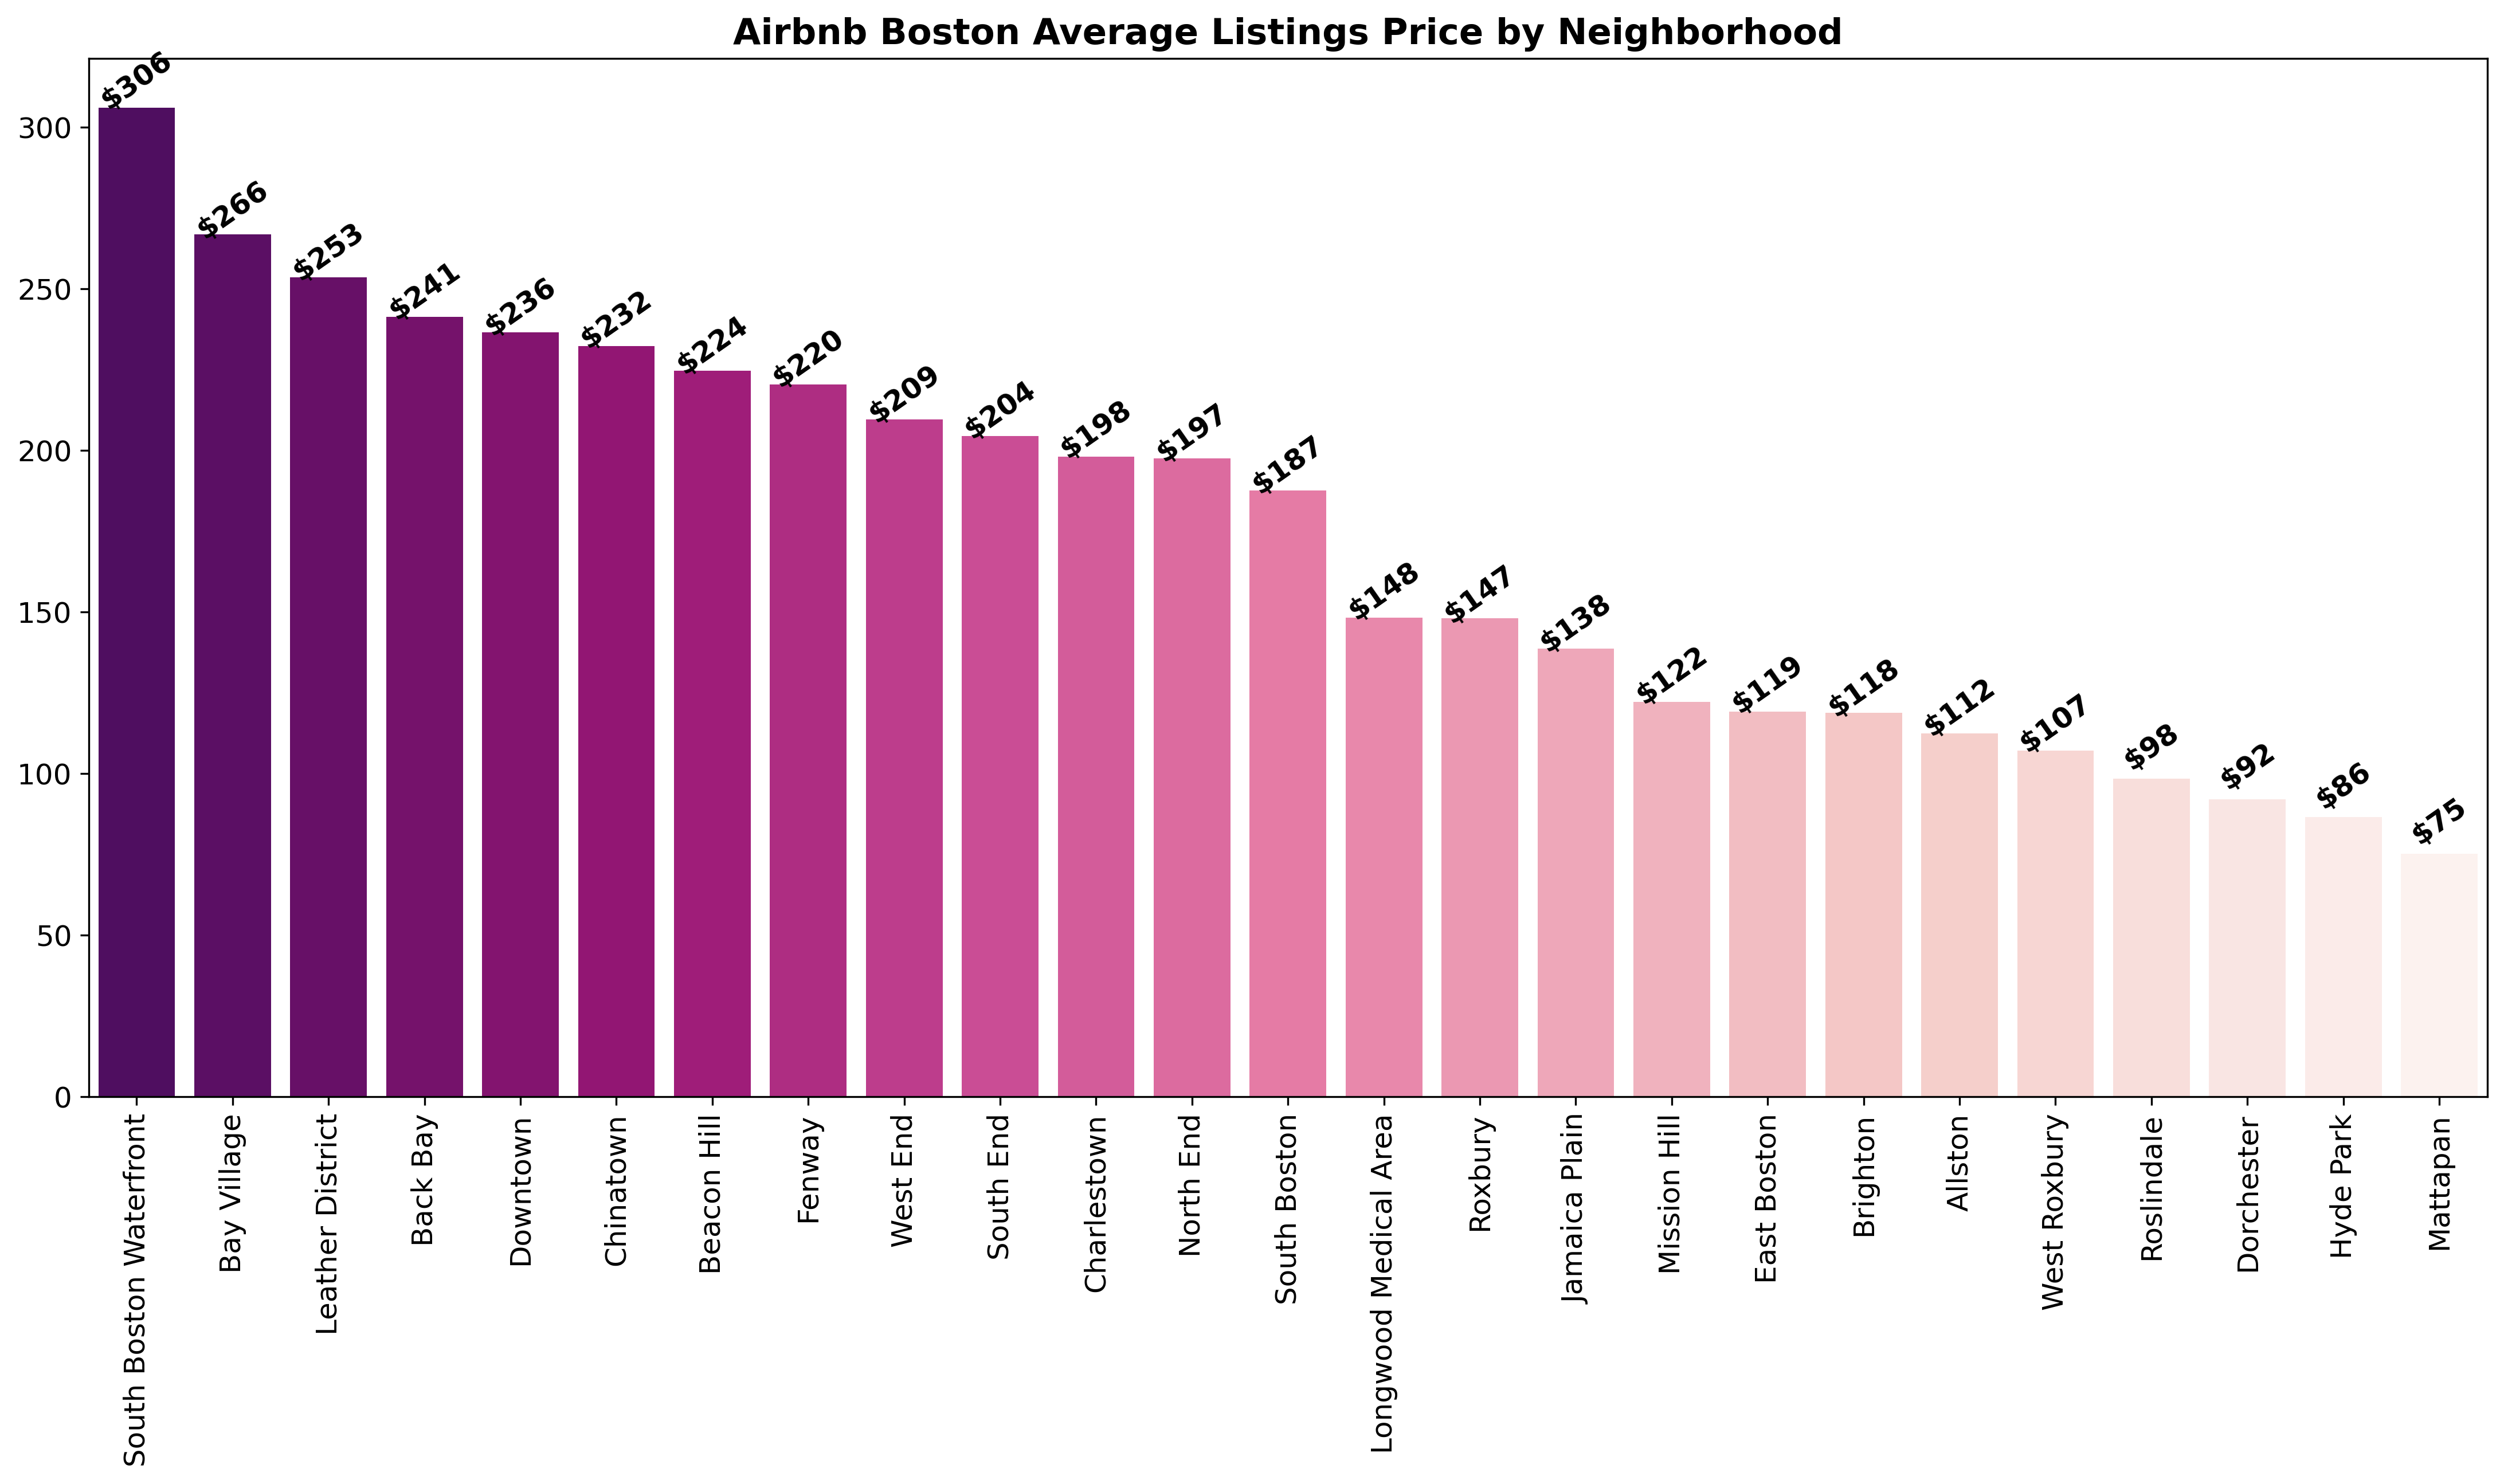

In [45]:
# Plot mean price by neighborhood
import matplotlib.pyplot as plt
plt.figure(figsize=(18, 8), dpi=300, facecolor='w', edgecolor='k')

x =  (df_listings.loc[df_listings_num['neighbourhood_cleansed'].isin(top_districts)].groupby('neighbourhood_cleansed')['price'].mean()).index
y = (df_listings.loc[df_listings_num['neighbourhood_cleansed'].isin(top_districts)].groupby('neighbourhood_cleansed')['price'].mean())
sns.barplot(x=x, y=y, order =y.sort_values(ascending=False).index, palette='RdPu_r', alpha=1) #YlGnBu_r, RdPu_r 

plt.title("Airbnb Boston Average Listings Price by Neighborhood", fontsize = 15,  weight='bold');
#plt.xlabel('Neighborhood');
#plt.ylabel('Price $');
plt.ylabel("")
plt.xlabel("")
plt.xticks(rotation = 90, fontsize = 12);
plt.yticks(fontsize = 12);


types_count = round(df_listings.loc[df_listings_num['neighbourhood_cleansed'].isin(top_districts)].groupby('neighbourhood_cleansed')['price'].mean().sort_values(ascending = False).astype('int'),0)
a = df_listings.loc[df_listings_num['neighbourhood_cleansed'].isin(top_districts)].groupby('neighbourhood_cleansed')['price'].mean().sort_values(ascending = False)

for i in range(a.shape[0]):
    count = types_count[i]
    plt.text(i, count+19, "$"+str(count), ha = 'center', va ='top', fontsize = 12, rotation = 35, color = 'black', weight='bold')
 
plt.savefig('./screenshots/2_Avg_Listings_Price_By_Neighborhoods.png', dpi=600, bbox_inches ='tight')
plt.show()

In [46]:
# Calculate mean price by neighborhood
round(df_listings.loc[df_listings_num['neighbourhood_cleansed'].isin(top_districts)].groupby('neighbourhood_cleansed')['price'].mean().sort_values(ascending = False),0)

neighbourhood_cleansed
South Boston Waterfront    306.0
Bay Village                267.0
Leather District           254.0
Back Bay                   241.0
Downtown                   236.0
Chinatown                  232.0
Beacon Hill                225.0
Fenway                     220.0
West End                   210.0
South End                  204.0
Charlestown                198.0
North End                  198.0
South Boston               188.0
Longwood Medical Area      148.0
Roxbury                    148.0
Jamaica Plain              139.0
Mission Hill               122.0
East Boston                119.0
Brighton                   119.0
Allston                    112.0
West Roxbury               107.0
Roslindale                  98.0
Dorchester                  92.0
Hyde Park                   87.0
Mattapan                    75.0
Name: price, dtype: float64

[Navigate Back to Summary Section Question-2](#2_1)

<a id='3'></a>
#### Question-3. How does pricing fluctuate in a monthly basis and which time of the year normally the price are high?

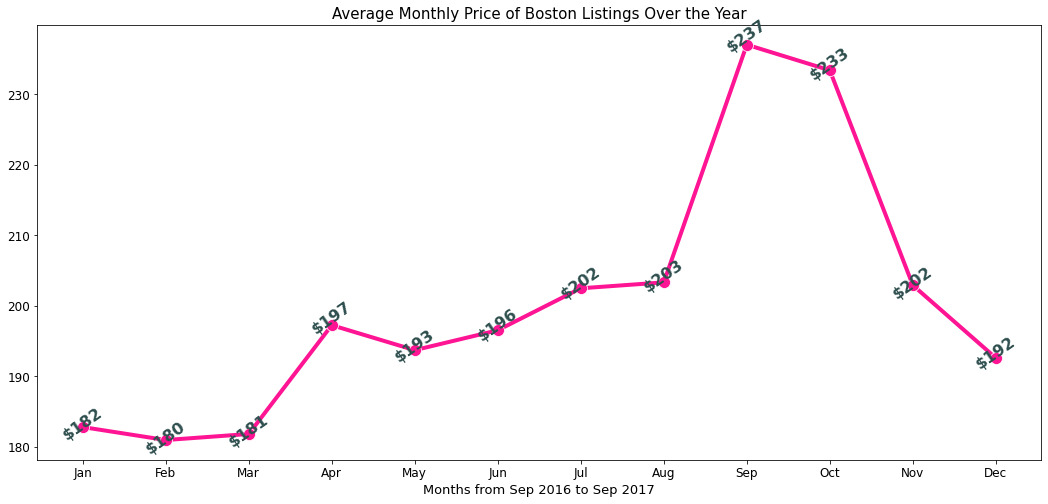

In [47]:
# Plot averaged monthly price
import matplotlib.pyplot as plt
plt.figure(figsize=(18, 8))
base = sns.color_palette()[2]
levels = ['Jan', 'Feb', 'Mar', 'Apr','May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
#df_calendar['month'] = pd.Categorical(df_calendar['month'], ordered=True, categories=levels)
#sns.lineplot( x = "month", y = "price",  data = df_calendar, linewidth =4, markers=True, marker = "o", markersize =12, color = base)
avg_price_month = df_calendar.groupby('month').mean()[['price']].sort_values(by = 'price',ascending = False)
avg_price_month.index = pd.Categorical(avg_price_month.index, ordered=True, categories=levels)
sns.lineplot(x = avg_price_month.index, y = 'price',  data = avg_price_month, linewidth =4, markers=True, marker = "o", markersize =12, color = "deeppink");

plt.title('Average Monthly Price of Boston Listings Over the Year', fontsize = 15);
#plt.xlabel('Month of the Year', fontsize = 12)
#plt.ylabel('Average Price ($)', fontsize = 12);
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)
plt.xlabel("Months from Sep 2016 to Sep 2017", fontsize = 13)
plt.ylabel("")

for i in (levels):
    count = int(avg_price_month.loc[i].values)
    plt.text(i, count+4, "$" + str(count), ha = 'center', va ='top', fontsize = 16, rotation = 35, color = 'darkslategrey', weight='bold')

#for i in range(avg_price_month.shape[0]):
#    count = round(avg_price_month.price[i],0)
#    plt.text(i, count+1, count, ha = 'center', va ='top', fontsize = 12, rotation = 35, color = 'black', weight='bold')
 

plt.savefig('./screenshots/3_Price_Trend_Over_the_Year.png', dpi=600, bbox_inches ='tight')
plt.show()

[Navigate Back to Summary Section Question-3](#3_1)

<a id='4'></a>
#### Question-4. Which property types and room types are comparatively listed more?

In [48]:
#Find the property type distribution percentage
df_property = pd.DataFrame()
df_property['Property_Type_count'] = df_listings.property_type.value_counts(ascending = False)
df_property['Property_Type_percentage'] = round(df_listings.property_type.value_counts(ascending = False)/df_listings.shape[0]*100, 2)
df_property

Property_Type_count  Property_Type_percentage
Apartment                       2592                     72.87
House                            556                     15.63
Condominium                      231                      6.49
Townhouse                         54                      1.52
Loft                              39                      1.10
Bed & Breakfast                   39                      1.10
Other                             17                      0.48
Boat                              12                      0.34
Villa                              6                      0.17
Entire Floor                       4                      0.11
Dorm                               2                      0.06
Camper/RV                          1                      0.03
Guesthouse                         1                      0.03

In [49]:
# #Find the room type distribution percentage
df_roomtype = pd.DataFrame()
df_roomtype['Room_Type_count'] = df_listings.room_type.value_counts()
df_roomtype['Room_Type_percentage'] = round(df_listings.room_type.value_counts()/df_listings.shape[0]*100, 2)
df_roomtype

Room_Type_count  Room_Type_percentage
Entire home/apt             2113                 59.40
Private room                1365                 38.38
Shared room                   79                  2.22

In [50]:
# Percentage of property types listing comparision

plt.figure(figsize=(12, 5), dpi=300, facecolor='w', edgecolor='red')
x = df_property.index
y = df_property.Property_Type_percentage
sns.barplot(x=x, y=y, order =x, palette='Dark2', alpha=1)

plt.title("Percentage Listings Comparision of Property Types", fontsize =16,  weight='bold');
#plt.xlabel('Property Types', fontsize =15);
#plt.ylabel('Percentage of Distribution', fontsize =15);
plt.ylabel("")
plt.xticks(rotation = 60, fontsize =12);
plt.yticks(fontsize =12);

for i in range(y.shape[0]):
    count = y[i]
    plt.text(i, count+3.2, str(count)+"%", ha = 'center', va ='top', fontsize =13,  weight='bold')   

plt.savefig('./screenshots/4_1_PCT_of_Property_Types_Listing.png', dpi=600, bbox_inches ='tight')
plt.show()

In [51]:
# Total number of property types listing comparision
plt.figure(figsize=(12, 5), dpi=300, facecolor='w', edgecolor='red')
x = df_property.index
y = df_property.Property_Type_count
sns.barplot(x=x, y=y, order =x, palette='Dark2', alpha=0.9)

plt.title("Total no of Listings Comparision of Property Types", fontsize =16,  weight='bold');
#plt.xlabel('Property Types', fontsize =15);
#plt.ylabel('Percentage of Distribution', fontsize =15);
plt.ylabel("")
plt.xticks(rotation = 60, fontsize =12);
plt.yticks(fontsize =12);


for i in range(y.shape[0]):
    count1 = y[i]
    plt.text(i, count1+115, count1, ha = 'center', va ='top', fontsize =13,  weight='bold')    

plt.savefig('./screenshots/4_2_Total_Listings_Comparision_Property_Type.png', dpi=600, bbox_inches ='tight')
#plt.subplots_adjust
plt.show()

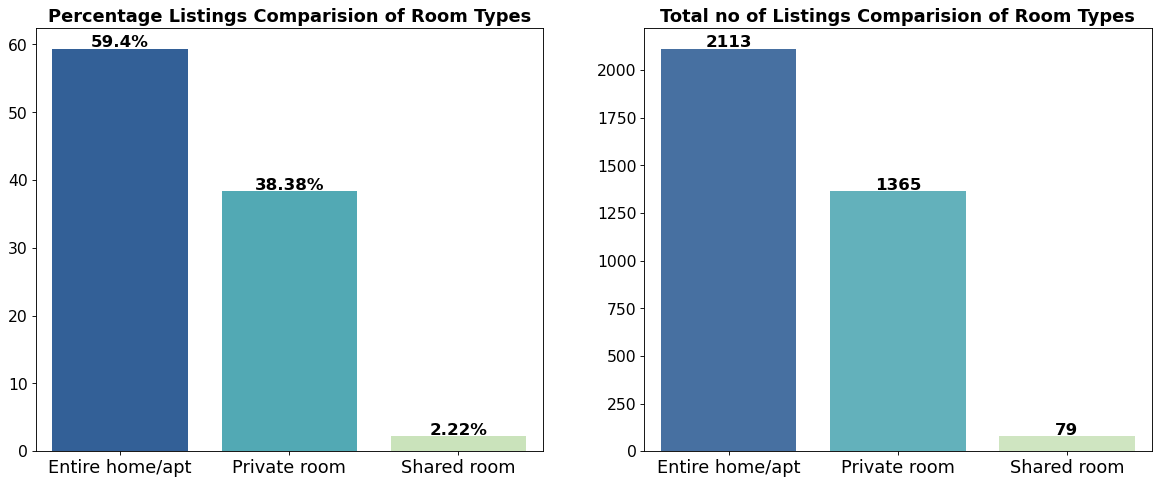

In [52]:
# Percentage listings comparision of room types

plt.figure(figsize=(18, 7), dpi=80, facecolor='w', edgecolor='red',constrained_layout=False)
plt.tight_layout(pad=3.0)

#Plot-1: Percent 
plt.subplot(1,2,1)
x = df_roomtype.index
y = df_roomtype.Room_Type_percentage
sns.barplot(x=x, y=y, order =x, palette='YlGnBu_r', alpha=1)


plt.title("Percentage Listings Comparision of Room Types", fontsize =16, weight = 'bold');
#plt.xlabel('Property Types', fontsize =15);
#plt.ylabel('Percentage of Distribution', fontsize =15);
plt.ylabel("")
plt.xticks(rotation = 0, fontsize =16);
plt.yticks(fontsize =14);


for i in range(y.shape[0]):
    count = y[i]
    plt.text(i, count+2, str(count)+"%", ha = 'center', va ='top', fontsize =15, weight = 'bold')   

# Total listings comparision of room types
plt.subplot(1,2,2)
x = df_roomtype.index
y = df_roomtype.Room_Type_count
sns.barplot(x=x, y=y, order =x, palette='YlGnBu_r', alpha=0.9)


plt.title("Total no of Listings Comparision of Room Types", fontsize =16, weight = 'bold');
#plt.xlabel('Property Types', fontsize =15);
#plt.ylabel('Percentage of Distribution', fontsize =15);
plt.ylabel("")
plt.xticks(rotation = 0, fontsize =16);
plt.yticks(fontsize =14);

for i in range(y.shape[0]):
    count1 = y[i]
    plt.text(i, count1+70, count1, ha = 'center', va ='top', fontsize =15, weight = 'bold')    

plt.savefig('./screenshots/4_3_Room_Type_Listings_Comparision.png', dpi=600, bbox_inches ='tight')
plt.show()

[Navigate Back to Summary Section Question-4](#4_1)

<a id='5'></a>
#### Question-5.How are the listings distributed across the Boston city?


To see how the listings are distributed across the Boston city, lets use the folium library to plot listings coordinates over Boston geography Map. There are different layers are added to the maps, so business users can switch to the desired layer to see the listing distributions.

In [53]:
import folium
from folium import Choropleth, Circle, Marker
from folium.plugins import HeatMap, MarkerCluster
import geopandas as gpd
import math

#Coordinate of Boston city: latitude (42.32° N) and longitude (-71.0589° E)
# Create a map
m_1 = folium.Map(location=[42.32,-71.0589], tiles='openstreetmap', zoom_start=10)

# Display the map
m_1

df = df_listings_num[['latitude', 'longitude']]
# Create a map
m_2 = folium.Map(location=[42.32,-71.0589], tiles='cartodbpositron', zoom_start=13)

# Add points to the map
for idx, row in df.iterrows():
    #Marker([row['latitude'], row['longitude']]).add_to(m_2)
    folium.Circle(radius=20, location=[row['latitude'], row['longitude']], color = 'forestgreen').add_to(m_2)  
   

# sabe and Display the map
#m_2.save("./screenshots/5_1_Boston_Listings_Distribution_map.png", dpi=100)
m_2



Listings distributions across Boston city can be visualized in the above map. As there are large no of data points/listings done across the Boston city, hence the markers are cluttered and some of them are overlapping. Due to this a more sophisticated way to visualize the listings distribution is implemented by grouping the listings of nearby areas.

Also different map layers like **openstreetmap , stamenterrain, stamentoner, cartodbpositron** etc. are added to the map to see different view of the listing distribution across the city.

In [54]:
import folium
#Coordinate of Boston city: latitude (42.32° N) and longitude (-71.0589° E)
fig2=folium.Figure(width=1050,height=550)
m_3 = folium.Map(location=[42.32,-71.0589],  zoom_start=11)
fig2.add_child(m_3)

# Add points to the map
mc = MarkerCluster()
for idx, row in df.iterrows():
    if not math.isnan(row['longitude']) and not math.isnan(row['latitude']):
        #mc.add_child(Marker([row['latitude'], row['longitude']]))
        mc.add_child(folium.Circle(radius=7, location=[row['latitude'], row['longitude']], color = 'forestgreen'))
m_3.add_child(mc)

# Display the map
folium.TileLayer('Stamen Terrain').add_to(m_3)
folium.TileLayer('Stamen Toner').add_to(m_3)
folium.TileLayer('Stamen Water Color').add_to(m_3)
folium.TileLayer('cartodbpositron').add_to(m_3)
folium.TileLayer('cartodbdark_matter').add_to(m_3)
folium.LayerControl().add_to(m_3)

#Save and display the maps
m_3
#m_3.save("./screenshots/5_2_Boston_Listings_Distribution_Grouped_map.png")

[Navigate Back to Summary Section Question-5](#5_1)

<a id='6'></a>
#### Question-6. What are the features that influence the property pricing?

In [55]:
#Visualize the price distribution of room types in the entire dataset
plt.figure(figsize=(13, 5), dpi=300)
#Visualize and understand the distriution of pricing among the each room type.
sns.histplot(df_listings_num[df_listings_num.room_type == 'Entire home/apt']['price'], kde=False, label='Entire home/apt', color = 'darkorange', alpha = 0.4, bins=150)
sns.histplot(df_listings_num[df_listings_num.room_type == 'Private room']['price'],kde=False, label='Private room', color = 'darkturquoise', alpha = 0.9,  bins=100)
sns.histplot(df_listings_num[df_listings_num.room_type == 'Shared room']['price'], kde=False, label='Shared room', color = "mediumvioletred", alpha = 0.9,  bins=15)
plt.xlim(0, 600)
plt.title('Airbnb Boston Price Distribution by Room Types', fontsize = 13, weight = 'bold')
plt.xlabel('Price ($)', fontsize = 11)
plt.legend();
plt.savefig('./screenshots/6_1_Price_Distribution_room_types.png', dpi=600, bbox_inches ='tight')

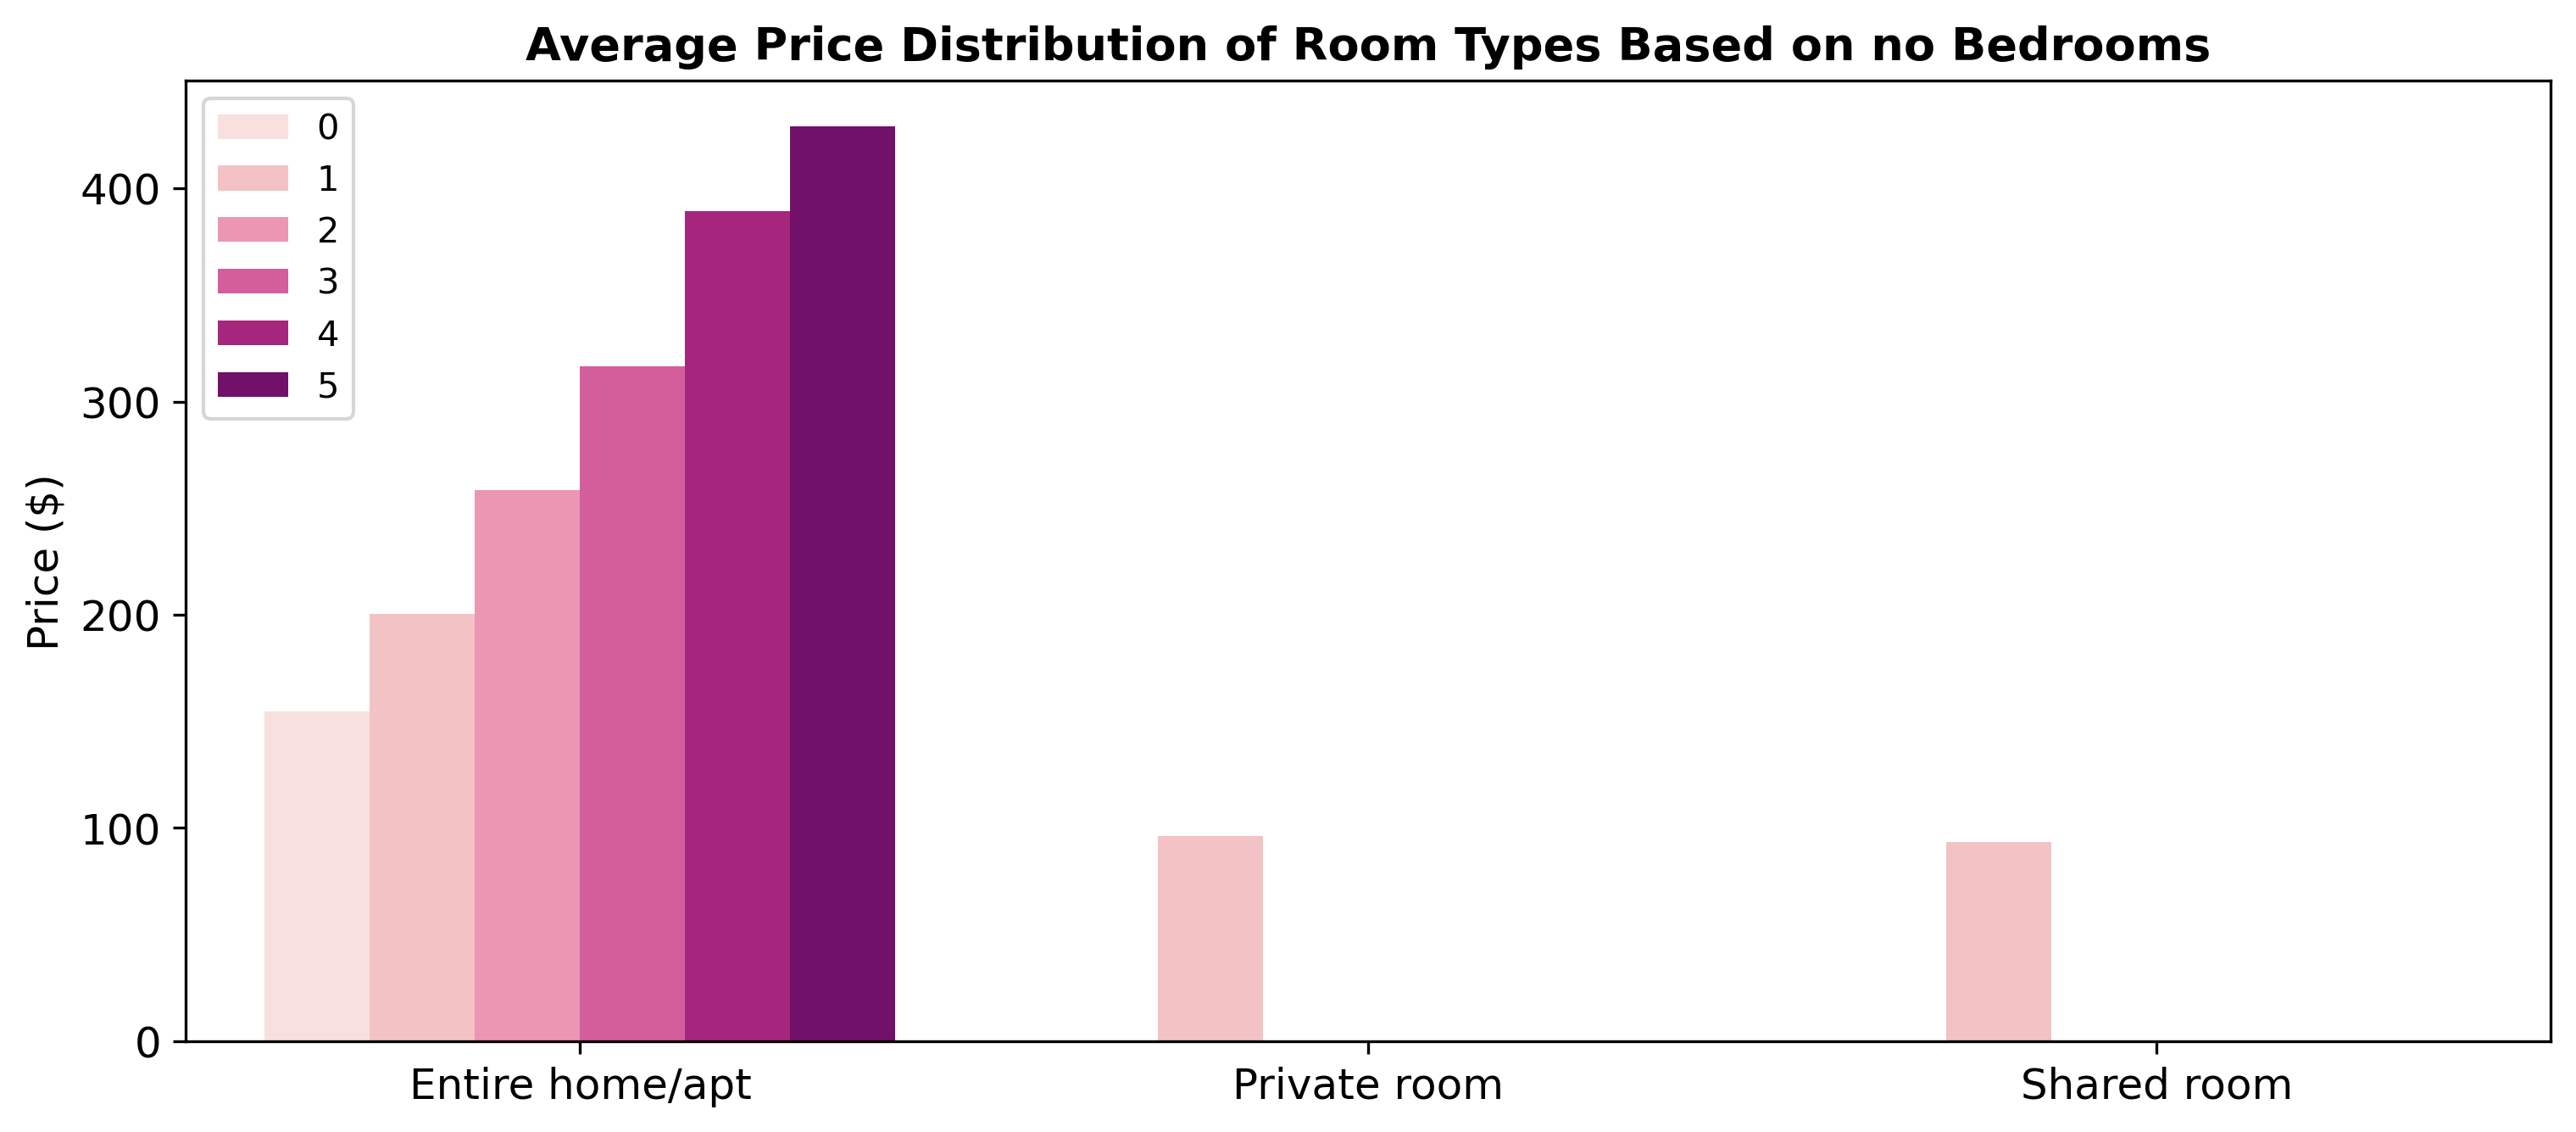

In [56]:
#Visualize the price distribution of room types based on the no of bedrooms
plt.figure(figsize=(12, 5), dpi=300)
df_bedroom = df_listings_num.groupby(['room_type', 'bedrooms'], as_index = False).mean()
sns.barplot(x="room_type", y="price", hue= 'bedrooms', data= df_bedroom, palette= 'RdPu')
plt.title('Average Price Distribution of Room Types Based on no Bedrooms', fontsize = 13, weight = 'bold')
plt.xlabel("")
plt.ylabel('Price ($)', fontsize =12)
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)
plt.legend();
plt.savefig('./screenshots/6_2_Avg_Price_Distribution_room_types_Per_Bedroom.png', dpi=600, bbox_inches ='tight')

In [57]:
plt.figure(figsize=(19, 8), dpi=80)
plt.subplot(1, 2, 1)
# Analyse how the prices are Cancellation Policy 
sns.boxplot(x='price', y='cancellation_policy', fliersize=1, linewidth=0.75, data=df_listings_num, palette='plasma_r',
            order=['flexible', 'moderate', 'strict', 'super_strict_30'])
plt.xlim(0, 600)
plt.title('Cancellation Policy and Pricing', fontsize= 15, weight = 'bold')
plt.xlabel('Price ($)', fontsize=15)
plt.ylabel('')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)


# Property type
plt.subplot(1, 2, 2)
sns.boxplot(x='price', y='property_type', fliersize=1, linewidth=0.75, data=df_listings_num, palette='plasma_r')
plt.xlim(0, 600)
plt.title('Property Type and Pricing', weight = 'bold', fontsize = 15)
plt.xlabel('Price ($)', fontsize=15)
plt.ylabel('')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.tight_layout(pad=3)
plt.savefig('./screenshots/6_3Cancellation_Policy_Propert_type_Pricing_Spread.png', dpi=600, bbox_inches ='tight')
plt.show();

[Navigate Back to Summary Section Question-6](#5_1)

<a id='Modeling'></a>
## 4. Modeling 

As part of this phase, a decision is taken to finalize which modeling technique to be used initially such as decision-tree, random forest building, Linear regression or neural network generation with backpropagation. In case several techniques are applied, this task need to be executed separately for each of the techniques.  Tasks that are performed as part of this phase are select a modelling techniques or algorithms to try (e.g. regression, ensemble models, neural net), split data into training and test sets, build the model, fit/train the model and perform prediction.

In our case, Linear Regression and RandomForestRegressor modeling techniques are used to build, train the model and predict the property prices.

<a id='7'></a>
#### Question-7 Create a model to predict property pricing

In [58]:
#Extract target variable to y and features to X
X = df_listings_dummies.drop(labels = ["price"], axis = 1)
y = df_listings_dummies.price

#split the data into train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

#Create a Linear Regression model to predict the prices
lm_model = LinearRegression()
lm_model.fit(X_train, y_train)

# Predict the property prices using the Linear Regression model
lm_train_pred = lm_model.predict(X_train)
lm_test_pred = lm_model.predict(X_test) 

#=============================================================================

#Create a RandomForestRegressor model to predict the prices
rf_model = RandomForestRegressor(n_estimators=100, random_state=0)    
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)

# Predict the property prices using the RandomForestRegressor model
rf_train_pred = rf_model.predict(X_train)
rf_test_pred = rf_model.predict(X_test) 

<a id='Evaluation'></a>
## 5. Evaluation 

The part of the CRISP DM process mostly focuses on evaluating the data or ML model created to check and compare how the model is performing and how well the performance/accuracy of the model suits to business need.

In this stage, the model is thoroughly evaluated, and steps executed to construct the model is reviewed to ascertain that it properly achieves the business objectives. A key objective is to determine if there is some important business issue that has not been sufficiently considered. 

The evaluation phase includes tasks such as evaluate results, review the process, analyze potential for deployment of each result.

In our case the metrices used to evaluate our model are R Squared score and Mean Absolute error  to decide which model is performing better for prediction. .

In [59]:
# Lets Evaluate our model using the sklear metrices like r2_score and mean_absolute_error

lm_train_score = r2_score(y_train, lm_train_pred)
lm_test_score = r2_score(y_test, lm_test_pred)

rf_train_score = r2_score(y_train, rf_train_pred)
rf_test_score = r2_score(y_test, rf_test_pred)

print("The R squared score on the Linear Regression training data is: {} and on the RandomForest Regressor training data is: {}.".format(lm_train_score, rf_train_score))
print("The R squared score on the Linear Regression test data is: {} and on the RandomForest Regressor test data is: {}.".format(lm_test_score, rf_test_score))

lm_mae = mean_absolute_error(y_test, lm_test_pred)
rf_mae = mean_absolute_error(y_test, rf_test_pred)

print("Mean Absolute Error on Linear Regression test data is: {} and Mean Absolute Error on RandomForest Regressor test data is: {}.".format(lm_mae, rf_mae))

The R squared score on the Linear Regression training data is: 0.3562662397238793 and on the RandomForest Regressor training data is: 0.9139040636012129.
The R squared score on the Linear Regression test data is: 0.42297519425398933 and on the RandomForest Regressor test data is: 0.4603537443328003.
Mean Absolute Error on Linear Regression test data is: 52.968207661647 and Mean Absolute Error on RandomForest Regressor test data is: 45.3513202247191.


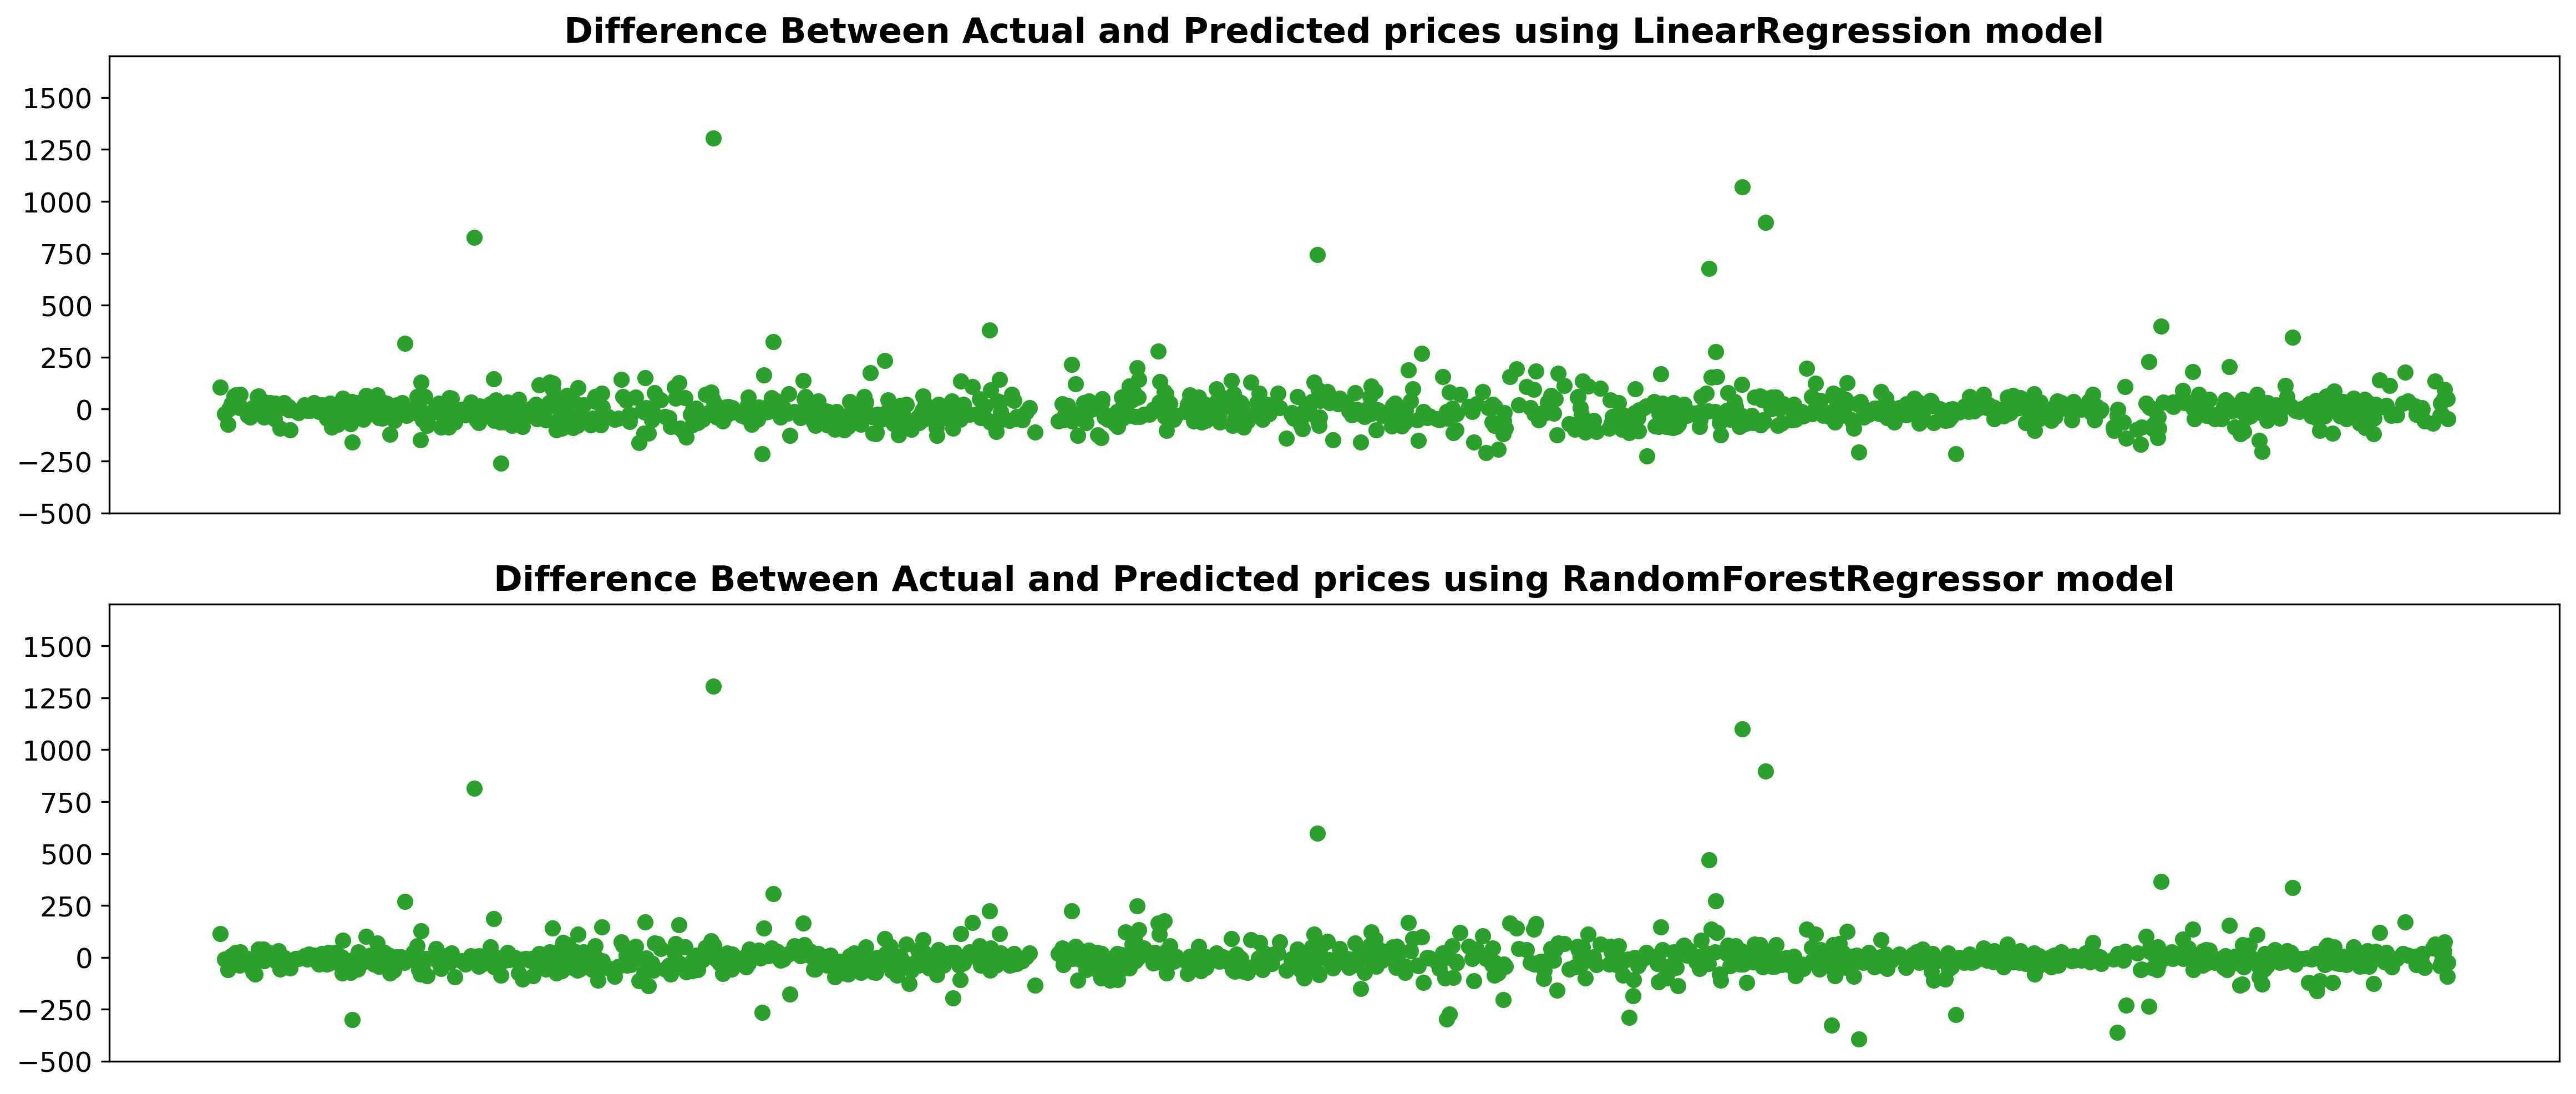

In [60]:
plt.figure(figsize=(19, 8), dpi=300)
plt.subplot(2,1,1)
plt.plot(y_test - lm_test_pred, marker='o',linestyle='', color =base)
#plt.ylabel('Actual and Pred Price Difference-LM Model');
plt.title("Difference Between Actual and Predicted prices using LinearRegression model", fontsize = 15, weight = 'bold')
plt.yticks(fontsize = 12)
plt.xticks([])
plt.ylim(-500, 1700)

plt.subplot(2,1,2)
plt.plot(y_test - rf_test_pred, marker='o',linestyle='', color =base)
#plt.ylabel('Actual and Pred Price Difference-RF Model');
plt.title('Difference Between Actual and Predicted prices using RandomForestRegressor model', fontsize = 15, weight = 'bold')
plt.yticks(fontsize = 12)
plt.xticks([])
plt.ylim(-500, 1700);
plt.savefig('./screenshots/7_LM_RF_Model_Performace_Comparision.png', dpi=600, bbox_inches ='tight')

In [61]:
df = pd.DataFrame()
df['LM_Predicted_Price'] = lm_test_pred
df['RF_Predicted_Price'] = rf_test_pred
df['Actual_y_test'] = y_test
df.tail(10)

LM_Predicted_Price  RF_Predicted_Price  Actual_y_test
1058           45.498833               58.70            NaN
1059           29.579999               55.08            NaN
1060          398.531103              363.37          170.0
1061          114.406691               81.26            NaN
1062           54.279288               91.99            NaN
1063          390.596486              372.34            NaN
1064          135.549752              155.85            NaN
1065          209.204096              159.69          210.0
1066           53.507566               59.85          110.0
1067          211.926415              199.59            NaN

[Navigate Back to Summary Section Question-7](#7_1)

<a id='Model_Deploy'></a>
## 6. Deploy

Once the model evaluation is done and model performance metrics are satisfactory, then the model can be deployed to production environment as part of the this phase. Depending on the requirements, the deployment phase can be as simple as generating a report or as complex as implementing a repeatable data mining process across the enterprise.

This phase is not implemented in our project as there is no need of deploying a model.


## 7. Summary of our Analysis to answer Business related queries

<a id='1_1'></a>
#### [1. Which are the neighborhoods with highest listings?](#1)

There are total of 25 neighborhoods listed in this AirBnB boston listings dataset. The neighborhood with the most listings is **Jamaica Plain** with 342 listings which is 9.61% of the total listings. The second highest district in the order is **South End** with 318 listings which is 8.94% of the total listings. **Black Bay**, **Fenway** and **Dorchester** districts are in the top 5 list of highest listings.

<a id='2_1'></a>
#### [2. Find out the most and least expensive neighborhoods?](#2)

**South Boston Waterfront** is the neighborhood that concentrates just 2.33% of the total listings, is the most expensive neighborhood with a mean price of USD 306. **Mattapan** which is the neighborhood with just 0.67% of total listings, is the least expensive neighborhood with a mean listing price of USD 75 which makes sense.

<a id='3_1'></a>
#### [3. How does pricing fluctuate in a monthly basis and Which time of the year normally the price are high?](#3)

The most expensive months of Boston property listings price are from late August to end of October and the least expensive are from Jan to March. This monthly price fluctuation correlates with the warm and cold seasons and because of may events and festivals planned during these periods.

**There is a peak in September with an average price of 237 USD followed by 233 USD in October**,  since these are the most popular months to have vacations in the city which makes sense for the peak prices.

Also our analysis represents these facts from web as it is evident that best time of the year to visit Boston starts from late July through October, when travelers/tourists have the best chance to experience pleasant weather for walking the Freedom and Black Heritage Trails, and all attractions open to visitors. Mid to late October is a great time for Boston sightseeing while taking in the gorgeous New England fall leaves.

Another incentive might help to catch a great deal on a hotel there. If winter is too cold for you but summer and autumn's hotel rates fall outside your budget, try visiting at the start of the spring season which is around the Feb End and March period when the prices are comparatively cheaper.

Hence it makes sense, the average prices for the property listings are bit high during August to October period and our analysis represents the reality here.

<a id='4_1'></a>
#### [4. Which property types and room types are comparatively listed most?](#4)

From the above Property_types listing visualization,  its transparent that the most frequently listed type is **Apartments with 2592 listings which is 72.87%** of the total property types. Houses are listed the second most with 556 listing i.e. 15.63% of the total and Condominiums follow with 231 listings which is 15.63% of the total.

From the above Room_types listing visualization, its noticeable that **Entire home/apt** types are listed the most, having count of **2113 which is 59.4%** of the total room types. "Private room" room types listed the second most having 1365 count i.e. 38.38% of the total followed by Shared rooms with 79 listings which is just 2.22% of the total.
Since the Apartments Property types and Entire home/apt room types are the most listed categories, it will definitely help Airbnb business leaders to put more focus on these types of categories to expand the business and maintain a healthy relationship with respective property owners. Also time to time some free services can be offered to these type of property owners to maintain a long-term relationship that will eventually help company's stable growth over the years.

<a id='5_1'></a>
#### [5.How are the listings distributed across the Boston city?](#5)

The distribution of listing on the Boston city map shows a dense number of listings are distributed along the motorway and railway. The listings are highly populated around Back Bay and South End (1089 listings),  North End (641 listings), Near Roxbury (606 listings), brighton (317 listings).

<a id='6_1'></a>
#### [6. What are the features that influence the property pricing?](#6)

<a id='7_1'></a>
#### [7. Create a model to predict property pricing](#7)

##### From the model evaluation process, here are the observations:

* The R squared score on the Linear Regression training data is: 0.3562662397238793 and on the RandomForest Regressor training data is: 0.9139040636012129.

* The R squared score on the Linear Regression test data is: 0.42297519425398933 and on the RandomForest Regressor test data is: 0.4603537443328003.

* Mean Squared Error on Linear Regression test data is: 52.968207661647 and Mean Squared Error on RandomForest Regressor test data is: 45.3513202247191 which indicates the RandomForestRefressor model is performing better.

* From both the RandomForestRefressor and Linear Regression price difference plots (between y_test true/actual values and y_predicted values), its noticeable that most of the points fall around -100 to 100, which indicates there is not much difference between the actual values and the predicted property values. When looking further at the plots, we can conclude the points are slightly away from zero in the Linear Regression plot where as in case of the RandomForestRefressor plot, the points are much cluttered around 0, which indicates the RandomForestRefressor model is performing better compared to the Linear Regression model. Hence the difference between the actual and predicted prices are less in Random Forest regression model compared to the Linear regression model. So for prediction, RandomForestRefressor model can be chosen.

<a id='1'></a>
## 8. Conclusion

The main advantage of CRISP-DM process is, being a cross-industry standard i.e. it can be implemented in any Data Science project notwithstanding its domain or destination. 

1. CRISP-DM provides a uniform framework for Guidelines and immense documentation for the data science projects.
2. This methodology is cost-effective as it includes several processes to take out simple data mining tasks and the processes are well established across industry.
3. CRISP-DM encourages best practices and allows projects to replicate easily
4. This methodology provides a uniform framework for planning and managing a project.
5. Being cross-industry standard, CRISP-DM can be implemented in any Data Science project irrespective of its domain.
6. CRISP-DM methodology allows to create a long-term strategy based on short iterations at the beginning of project development. During first iterations, a team can create a basic and simple model cycle that can easily be improved in further iterations.

CRISP-DM has been the de-facto industry standard process model for data mining, with an expanding number of applications across a wide array of industries. It is extremely important that every data scientist and data miner must understand the different steps of this model.
Hence its always a better practice to follow the CRISP DM process as part of any Data Sciene projects. 